In [1]:
#importing libraries
%matplotlib inline
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rcParams
from mpl_toolkits import mplot3d
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
rcParams['figure.figsize'] = 8,6
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

##### A funtion for putting percentages on plots

In [3]:
def annotate_perc(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

##### Reading Application Data file

In [4]:
#Reading the data into a dataframe
df = pd.read_csv("data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
#First lets find the shape(number of rows and columns) of the dataframe
df.shape

(307511, 122)

In [6]:
#Let's check the datatype of each of the column
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
df.describe(include=['object','int64','float64'])

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

#### Showing columns that have null values

In [8]:
len(df.isnull().sum()[df.isnull().sum() != 0])

67

#### There are 67 columns that are null

#### Percentage of missing values for each feature

In [9]:
dict_isna = {"Feature": [], "No_of_NaN": [], "Percent_NaN": []}
for column, na_num in zip(df.columns, df.isna().sum().to_list()):
    dict_isna["Feature"].append(column)
    dict_isna["No_of_NaN"].append(na_num)
    dict_isna["Percent_NaN"].append(np.around((na_num/df.shape[0])*100, decimals=2))
df_isna = pd.DataFrame(dict_isna)
df_isna.sort_values(by="No_of_NaN", ascending=False)

Feature  No_of_NaN  Percent_NaN
76                COMMONAREA_MEDI     214865        69.87
48                 COMMONAREA_AVG     214865        69.87
62                COMMONAREA_MODE     214865        69.87
70       NONLIVINGAPARTMENTS_MODE     213514        69.43
56        NONLIVINGAPARTMENTS_AVG     213514        69.43
84       NONLIVINGAPARTMENTS_MEDI     213514        69.43
86             FONDKAPREMONT_MODE     210295        68.39
68          LIVINGAPARTMENTS_MODE     210199        68.35
54           LIVINGAPARTMENTS_AVG     210199        68.35
82          LIVINGAPARTMENTS_MEDI     210199        68.35
52                  FLOORSMIN_AVG     208642        67.85
66                 FLOORSMIN_MODE     208642        67.85
80                 FLOORSMIN_MEDI     208642        67.85
75               YEARS_BUILD_MEDI     204488        66.50
61               YEARS_BUILD_MODE     204488        66.50
47                YEARS_BUILD_AVG     204488        66.50
21                    OWN_CAR_AGE     202929        65.99
81                  LANDAREA_MEDI     182590        59.38
67                  LANDAREA_MODE     182590        59.38
53                   LANDAREA_AVG     182590        59.38
73              BASEMENTAREA_MEDI     179943        58.52
45               BASEMENTAREA_AVG     179943        58.52
59              BASEMENTAREA_MODE     179943        58.52
41                   EXT_SOURCE_1     173378        56.38
71             NONLIVINGAREA_MODE     169682        55.18
57              NONLIVINGAREA_AVG     169682        55.18
85             NONLIVINGAREA_MEDI     169682        55.18
77                 ELEVATORS_MEDI     163891        53.30
49                  ELEVATORS_AVG     163891        53.30
63                 ELEVATORS_MODE     163891        53.30
89             WALLSMATERIAL_MODE     156341        50.84
72                APARTMENTS_MEDI     156061        50.75
44                 APARTMENTS_AVG     156061        50.75
58                APARTMENTS_MODE     156061        50.75
78                 ENTRANCES_MEDI     154828        50.35
50                  ENTRANCES_AVG     154828        50.35
64                 ENTRANCES_MODE     154828        50.35
55                 LIVINGAREA_AVG     154350        50.19
69                LIVINGAREA_MODE     154350        50.19
83                LIVINGAREA_MEDI     154350        50.19
87                 HOUSETYPE_MODE     154297        50.18
65                 FLOORSMAX_MODE     153020        49.76
79                 FLOORSMAX_MEDI     153020        49.76
51                  FLOORSMAX_AVG     153020        49.76
60   YEARS_BEGINEXPLUATATION_MODE     150007        48.78
74   YEARS_BEGINEXPLUATATION_MEDI     150007        48.78
46    YEARS_BEGINEXPLUATATION_AVG     150007        48.78
88                 TOTALAREA_MODE     148431        48.27
90            EMERGENCYSTATE_MODE     145755        47.40
28                OCCUPATION_TYPE      96391        31.35
43                   EXT_SOURCE_3      60965        19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR      41519        13.50
117     AMT_REQ_CREDIT_BUREAU_DAY      41519        13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK      41519        13.50
119     AMT_REQ_CREDIT_BUREAU_MON      41519        13.50
120     AMT_REQ_CREDIT_BUREAU_QRT      41519        13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR      41519        13.50
11                NAME_TYPE_SUITE       1292         0.42
91       OBS_30_CNT_SOCIAL_CIRCLE       1021         0.33
92       DEF_30_CNT_SOCIAL_CIRCLE       1021         0.33
93       OBS_60_CNT_SOCIAL_CIRCLE       1021         0.33
94       DEF_60_CNT_SOCIAL_CIRCLE       1021         0.33
42                   EXT_SOURCE_2        660         0.21
10                AMT_GOODS_PRICE        278         0.09
9                     AMT_ANNUITY         12         0.00
29                CNT_FAM_MEMBERS          2         0.00
95         DAYS_LAST_PHONE_CHANGE          1         0.00
6                    CNT_CHILDREN          0         0.00
102               FLAG_D

#### Plotting top 20 missing columns 

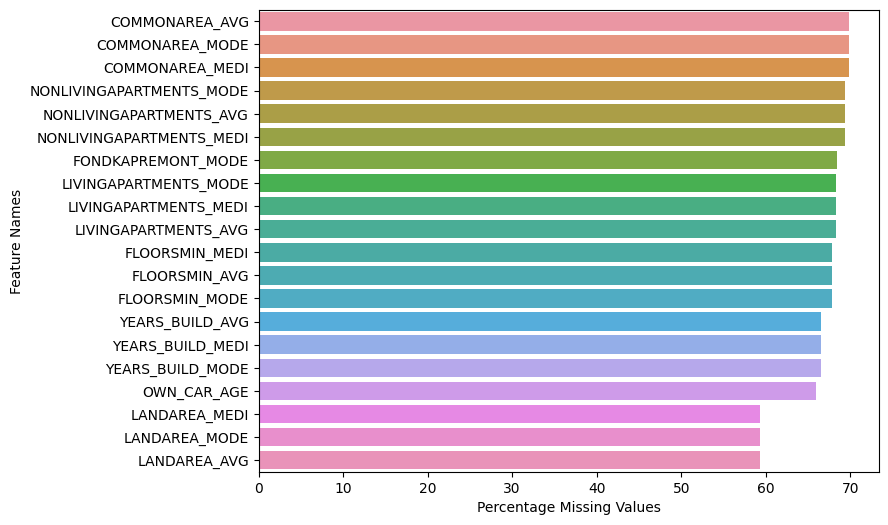

In [10]:
df_isna = df_isna[df_isna['Percent_NaN'] != 0]
df_isna = df_isna.sort_values(by="No_of_NaN", ascending=False)[:20]
g = sns.barplot(y = 'Feature',
            x = 'Percent_NaN',
            data = df_isna)
g.set_xlabel('Percentage Missing Values')
g.set_ylabel('Feature Names')
# Show the plot
plt.show()

In [11]:
#(df.isnull().mean() * 100).sort_values(ascending=False) ## easier way is to calculate using mean

##### putting columns that have more than 50% missing values in a dataframe and saving for later analysis, if needed.

In [12]:
df0=df.loc[:, df.isnull().mean() >= .50]
df0.head()

OWN_CAR_AGE  EXT_SOURCE_1  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          NaN      0.083037          0.0247            0.0369   
1          NaN      0.311267          0.0959            0.0529   
2         26.0           NaN             NaN               NaN   
3          NaN           NaN             NaN               NaN   
4          NaN           NaN             NaN               NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
0         0.1250        0.0369                0.0202          0.0190   
1         0.3333        0.0130                0.0773          0.0549   
2            NaN           NaN                   NaN             NaN   
3            NaN           NaN                   NaN             NaN   
4            NaN           NaN                   NaN             NaN   

   NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
0                   0.0000             0.0000           0.0252   
1                   0.0039             0.0098           0.0924   
2                      NaN                NaN              NaN   
3                      NaN                NaN              NaN   
4                      NaN                NaN              NaN   

   BASEMENTAREA_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
0             0.0383            0.6341           0.0144          0.0000   
1             0.0538            0.8040           0.0497          0.0806   
2                NaN               NaN              NaN             NaN   
3                NaN               NaN              NaN             NaN   
4                NaN               NaN              NaN             NaN   

   ENTRANCES_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  \
0          0.0690          0.1250         0.0377                  0.022   
1          0.0345          0.3333         0.0128                  0.079   
2             NaN             NaN            NaN                    NaN   
3             NaN             NaN            NaN                    NaN   
4             NaN             NaN            NaN                    NaN   

   LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  \
0           0.0198                       0.0                 0.0   
1           0.0554                       0.0                 0.0   
2              NaN                       NaN                 NaN   
3              NaN                       NaN                 NaN   
4              NaN                       NaN                 NaN   

   APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  \
0           0.0250             0.0369            0.6243           0.0144   
1           0.0968             0.0529            0.7987           0.0608   
2              NaN                NaN               NaN              NaN   
3              NaN                NaN               NaN              NaN   
4              NaN                NaN               NaN              NaN   

   ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  \
0            0.00          0.0690          0.1250         0.0375   
1            0.08          0.0345          0.3333         0.0132   
2             NaN             NaN             NaN            NaN   
3             NaN             NaN             NaN            NaN   
4             NaN             NaN             NaN            NaN   

   LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  \
0                 0.0205           0.0193                    0.0000   
1                 0.0787           0.0558       

In [13]:
df0.shape

(307511, 41)

In [14]:
df0.to_csv("C:/vIDUSHI/SJSU/Data230 -Data Visualization/Project/df0_morethan50%missing.csv")

#### less then 50%

In [15]:
df1=df.loc[:, df.isnull().mean() < .50]

In [16]:
df1.to_csv("C:/vIDUSHI/SJSU/Data230 -Data Visualization/Project/df1_lessthan50%missing.csv")

#### Analyzing the columns with less than 13% missing values

In [17]:
df2=df.loc[:, df.isnull().mean() <= .13]

In [18]:
df2.to_csv("C:/vIDUSHI/SJSU/Data230 -Data Visualization/Project/df2.csv")

In [19]:
df2 = pd.read_csv("C:/vIDUSHI/SJSU/Data230 -Data Visualization/Project/df2.csv")

In [20]:
df2 = df2.drop(columns=['Unnamed: 0'])
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [21]:
df2.shape

(307511, 65)

##### Checking for null columns remaining for imputation

In [22]:
df2.isnull().sum()[df2.isnull().sum() != 0].sort_values(ascending=False)

NAME_TYPE_SUITE             1292
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
EXT_SOURCE_2                 660
AMT_GOODS_PRICE              278
AMT_ANNUITY                   12
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
dtype: int64

#### 10 columns still have null data.

#### Checking what kind of values each categorical feature has.

In [23]:
print('\033[1m' + '\033[94m' + 'NAME_CONTRACT_TYPE' + '\033[0m : ', df2['NAME_CONTRACT_TYPE'].unique())
print('\033[1m' + '\033[94m' + 'CODE_GENDER' + '\033[0m : ',df2['CODE_GENDER'].unique())
print('\033[1m' + '\033[94m' + 'FLAG_OWN_CAR' + '\033[0m : ',df2['FLAG_OWN_CAR'].unique())
print('\033[1m' + '\033[94m' + 'FLAG_OWN_REALTY	' + '\033[0m : ',df2['FLAG_OWN_REALTY'].unique())
print('\033[1m' + '\033[94m' + 'NAME_TYPE_SUITE' + '\033[0m : ',df2['NAME_TYPE_SUITE'].unique())
print('\033[1m' + '\033[94m' + 'NAME_INCOME_TYPE' + '\033[0m : ',df2['NAME_INCOME_TYPE'].unique())
print('\033[1m' + '\033[94m' + 'NAME_EDUCATION_TYPE' + '\033[0m : ',df2['NAME_EDUCATION_TYPE'].unique())
print('\033[1m' + '\033[94m' + 'NAME_FAMILY_STATUS' + '\033[0m : ',df2['NAME_FAMILY_STATUS'].unique())
print('\033[1m' + '\033[94m' + 'NAME_HOUSING_TYPE' + '\033[0m : ',df2['NAME_HOUSING_TYPE'].unique())
print('\033[1m' + '\033[94m' + 'WEEKDAY_APPR_PROCESS_START' + '\033[0m : ',df2['WEEKDAY_APPR_PROCESS_START'].unique())
print('\033[1m' + '\033[94m' + 'ORGANIZATION_TYPE' + '\033[0m : ',df2['ORGANIZATION_TYPE'].unique())


NAME_CONTRACT_TYPE :  ['Cash loans' 'Revolving loans']
CODE_GENDER :  ['M' 'F' 'XNA']
FLAG_OWN_CAR :  ['N' 'Y']
FLAG_OWN_REALTY	 :  ['Y' 'N']
NAME_TYPE_SUITE :  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE :  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE :  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS :  ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE :  ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
WEEKDAY_APPR_PROCESS_START :  ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
ORGANIZATION_TYPE :  ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Bu

##### Converting negative number of days values to positive. 
##### Since number of day cannot be a float value, hence converting them to int.


In [24]:
df2.iloc[:,17:21]=df2.iloc[:,17:21].abs().astype('int64')


##### filling missing count of family member column with 0
##### Since count of family members is an integer value. Hence, conversion is to be done.


In [25]:
df2['CNT_FAM_MEMBERS']=df2['CNT_FAM_MEMBERS'].fillna(0).astype('int64')

##### checking for NAME_TYPE_SUITE missing values and imputation

In [26]:
df2['NAME_TYPE_SUITE'].isnull().sum()

1292

In [27]:
df2['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

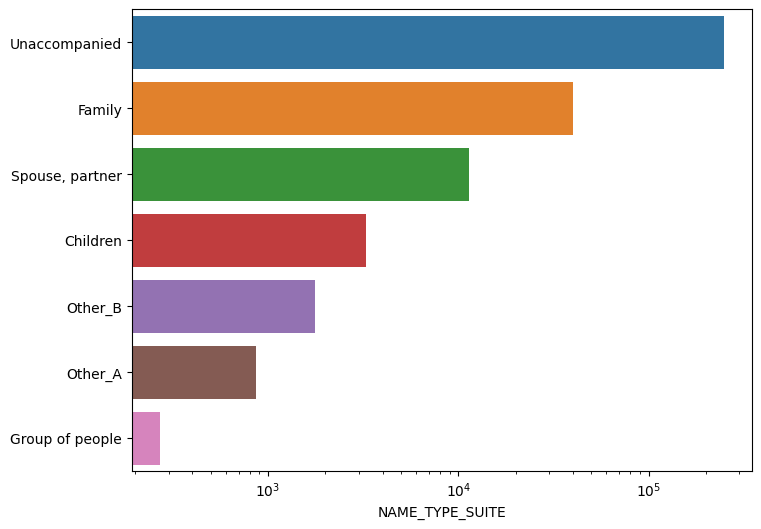

In [28]:
ax = sns.barplot(x=df2["NAME_TYPE_SUITE"].value_counts(),y=df2["NAME_TYPE_SUITE"].value_counts().index,log=True)
plt.show()

#### Impute NAME_TYPE_SUITE with 'Unaccompanied'

In [29]:
df2['NAME_TYPE_SUITE'].fillna(value='Unaccompanied', inplace=True)

In [30]:
df2['NAME_TYPE_SUITE'].isnull().sum()

0

##### checking for AMT_GOODS_PRICE missing values and imputation

In [31]:
df2['AMT_GOODS_PRICE'].isnull().sum()

278

#### AMT_GOODS_PRICE = For consumer loans it is the price of the goods for which the loan is given

In [32]:
df2['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [33]:
df2['AMT_GOODS_PRICE'].fillna(value=df2['AMT_GOODS_PRICE'].mean(), inplace=True)

##### An annuity loan is a type of amortizing loan. Unlike an installment loan, the principal of an annuity loan is amortized by a series of identical installments (annuities). The combined loan principal and interest charges are divided by the number of amortization payments to be made

##### checking for AMT_GOODS_PRICE missing values and imputation

In [34]:
df2['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [35]:
df2['AMT_ANNUITY'].fillna(value=df2['AMT_ANNUITY'].mean(), inplace=True)

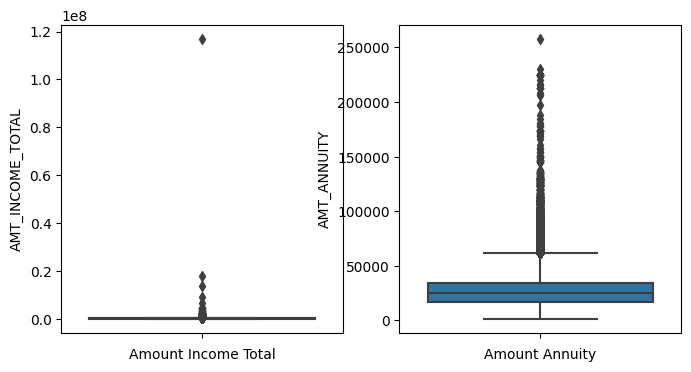

In [36]:
fig,ax = plt.subplots(ncols=2,figsize=(8,4))
sns.boxplot( y=df2["AMT_INCOME_TOTAL"],ax=ax[0]);
sns.boxplot( y=df2["AMT_ANNUITY"],ax=ax[1]);
ax[0].set_xlabel("Amount Income Total")
ax[1].set_xlabel("Amount Annuity")

plt.show()

#####  DAYS_LAST_PHONE_CHANGE = How many days before application did client change phone

In [37]:
df2['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

##### Since this denotes is the day when last phone was changed, it should not be 0 as that would trigger suspicion.So imputing with mean seems to be a better option.

In [38]:
df2['DAYS_LAST_PHONE_CHANGE'].fillna(value=df2['DAYS_LAST_PHONE_CHANGE'].mean(), inplace=True)


In [39]:
df2['DAYS_LAST_PHONE_CHANGE']=df2['DAYS_LAST_PHONE_CHANGE'].astype('int64').abs()

In [40]:
df2['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

##### This field denotes the normalized credit score from third party. Imputing it with mean.

In [41]:
df2['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [42]:
df2['EXT_SOURCE_2'].fillna(value=df2['EXT_SOURCE_2'].mean(), inplace=True)


In [43]:
df2.isnull().sum()[df2.isnull().sum() != 0].sort_values(ascending=False)

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

##### OBS_30_CNT_SOCIAL_CIRCLE -How many observation of client's social surroundings with observable 30 DPD (days past due) default
##### DEF_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
##### Same for 60 days

In [47]:
df2['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [48]:
df2['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=df2['OBS_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df2['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=df2['DEF_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df2['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=df2['OBS_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df2['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=df2['DEF_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)


In [49]:
##### converting these social citings related columns to integer type
#OBS_30_CNT_SOCIAL_CIRCLE    1021
#DEF_30_CNT_SOCIAL_CIRCLE    1021
#OBS_60_CNT_SOCIAL_CIRCLE    1021
#DEF_60_CNT_SOCIAL_CIRCLE    1021

In [50]:
#Since count is supposed to be an positive integer value. Hence we convert it to int
df2.iloc[:,40:45]=df2.iloc[:,40:45].astype('int64')

In [51]:
df2[df2['OBS_30_CNT_SOCIAL_CIRCLE'] > 2][['TARGET','CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]

df2.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0                1   
1                 1           1           0                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.262949                         2                         2   
1      0.622246                         1                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                    1134   
1                         1                         0                     828   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0                 0                 0  
1                 0                 0                 0                 0

In [52]:
df2.isnull().sum()[df2.isnull().sum() != 0].sort_values(ascending=False)

Series([], dtype: int64)

##### Now all the columns are filled with appropriate values

#### BINNING

In [53]:
df2['AGE_OF_APPLICANT'] = round((df2['DAYS_BIRTH']/365),2)
bins = [0,20,30,40,50,60,100 ]
labels = ['<20','20-30','30-40','40-50','50-60','>60']
df2['AGE_CATEGORY'] = pd.cut(x=df2['AGE_OF_APPLICANT'], bins=bins,labels=labels)
df2.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0                1   
1                 1           1           0                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.262949                         2                         2   
1      0.622246                         1                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                    1134   
1                         1                         0                     828   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   



In [55]:
df2['AGE_CATEGORY'].value_counts()

30-40    82316
40-50    76526
50-60    68066
20-30    45041
>60      35562
<20          0
Name: AGE_CATEGORY, dtype: int64

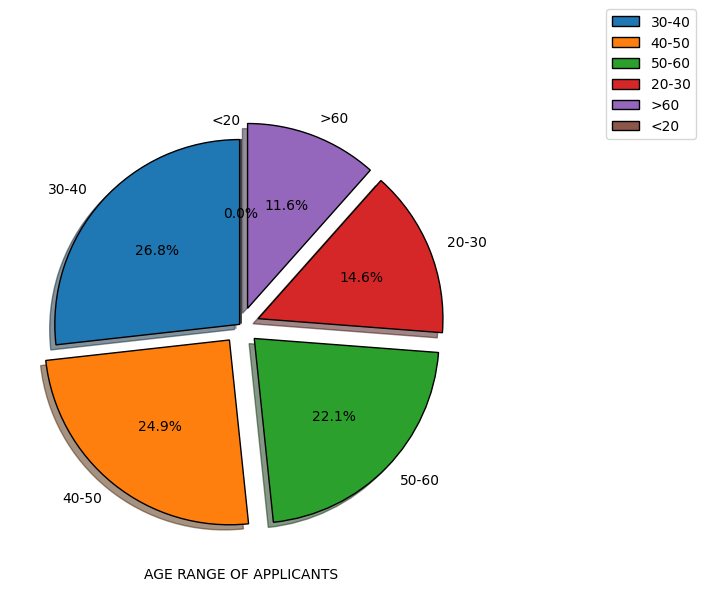

In [56]:
fig,ax = plt.subplots()
explode = [0.01,0.1,0.1,0.1,0.1,0.01]
label_full = ['30-40','40-50','50-60','20-30','>60','<20']
ax.pie(df2['AGE_CATEGORY'].value_counts(), wedgeprops = {'edgecolor': 'black'},shadow=True,startangle=90,autopct='%1.1f%%',explode=explode,labels=label_full);
ax.set_xlabel('AGE RANGE OF APPLICANTS');
ax.legend(loc='upper right',labels=label_full,bbox_to_anchor=(1.5,1.2));
plt.show();

In [57]:
#Binning the Annual Income
bins = [10000, 500000, 1000000, 1500000, 2000000, np.inf]
names = ['Low Income', 'Below average Income', 'Average Income', 'Above Average Income', 'High Income']
df2['ANNUAL_INCOME_RANGE'] = pd.cut(df2['AMT_INCOME_TOTAL'], bins, labels=names)

In [58]:
df2['ANNUAL_INCOME_RANGE'].value_counts()

Low Income              304809
Below average Income      2452
Average Income             166
High Income                 44
Above Average Income        40
Name: ANNUAL_INCOME_RANGE, dtype: int64

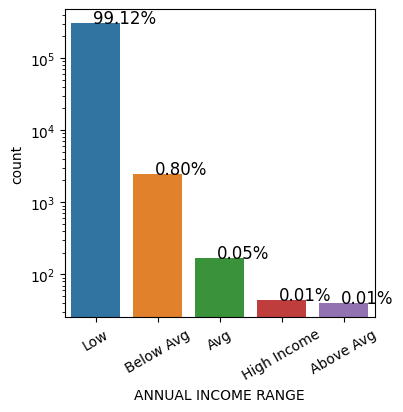

In [59]:
plt.figure(figsize=(4,4))
lab =['Low', 'Below Avg', 'Avg','High Income','Above Avg']
ax= sns.barplot(x=lab,y=df2['ANNUAL_INCOME_RANGE'].value_counts(),log=True,data = df2)
ax.set_xticklabels(labels = lab, rotation=30);
ax.set_ylabel("count")
ax.set_xlabel("ANNUAL INCOME RANGE");
annotate_perc(ax,df2.ANNUAL_INCOME_RANGE)

#### VISUALIZATIONS

In [60]:
x1=round(df2.TARGET.value_counts(normalize=True)*100,2)
#x1 = x1.astype(str) + "%"
x1

0    91.93
1     8.07
Name: TARGET, dtype: float64

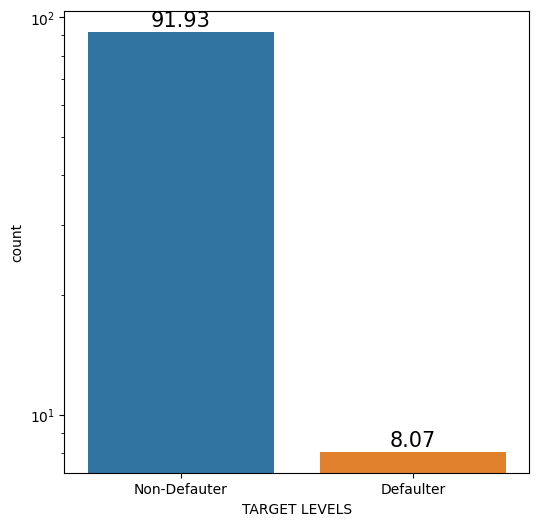

In [62]:
plt.figure(figsize=(6,6))
lab =['Non-Defauter','Defaulter']
ax= sns.barplot(x=lab,y=x1,log=True)
ax.set_ylabel("count")
ax.set_xlabel("TARGET LEVELS");
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    

In [63]:
df2['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [64]:
df2['CODE_GENDER'] = df2['CODE_GENDER'].replace('XNA', 'F')

In [65]:
df2['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

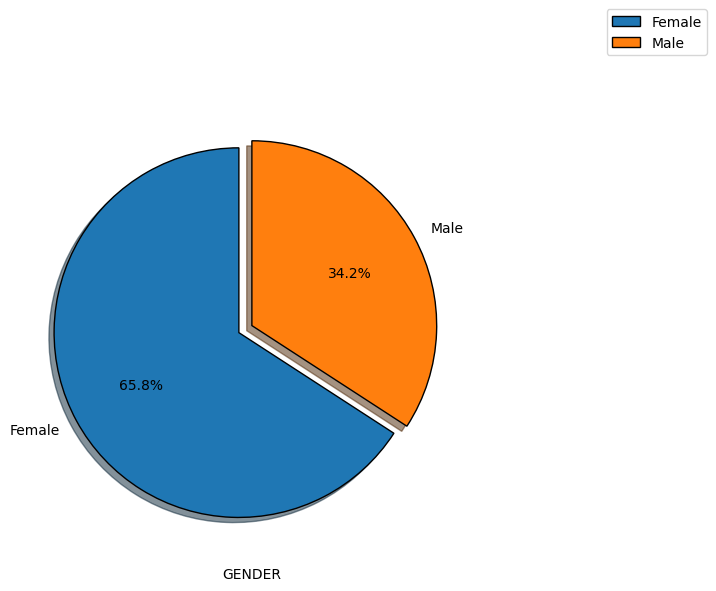

In [66]:
fig,ax = plt.subplots()
explode = [0.08,0]
label_full = ['Female','Male']
ax.pie(df2['CODE_GENDER'].value_counts(), wedgeprops = {'edgecolor': 'black'},shadow=True,startangle=90,autopct='%1.1f%%',explode=explode,labels=label_full);
ax.set_xlabel('GENDER');
ax.legend(loc='upper right',labels=label_full,bbox_to_anchor=(1.5,1.2));
plt.show();

In [67]:
df2_gen = df2.groupby(['TARGET','CODE_GENDER'])

In [68]:
df2_gen

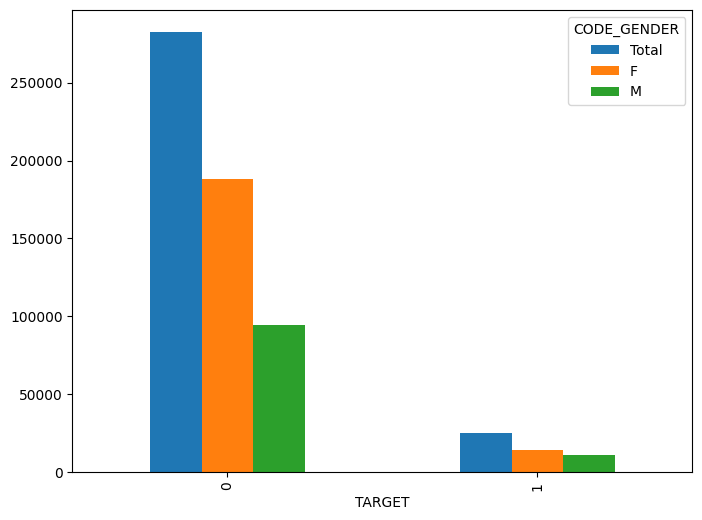

In [69]:
df2_gen_sz = df2_gen.size().unstack()
df2_gen_sz['Total'] = df2_gen_sz.sum(axis=1)
df2_gen_sz[['Total','F','M']].plot(kind='bar',style='ggplot')
plt.show()

In [70]:
#### Calculate Ratio of male and female
df_gen = df2[df2['TARGET'] == 1]['CODE_GENDER'].value_counts()
df_gen

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

In [71]:
total_m = df2['CODE_GENDER'].value_counts()['M']
total_f = df2['CODE_GENDER'].value_counts()['F']

In [72]:
total_m,total_f

(105059, 202452)

In [73]:
df_male = df_gen['M']/total_m

In [74]:
df_female = df_gen['F']/total_f

In [75]:
df_male,df_female

(0.1014192025433328, 0.06999189931440539)

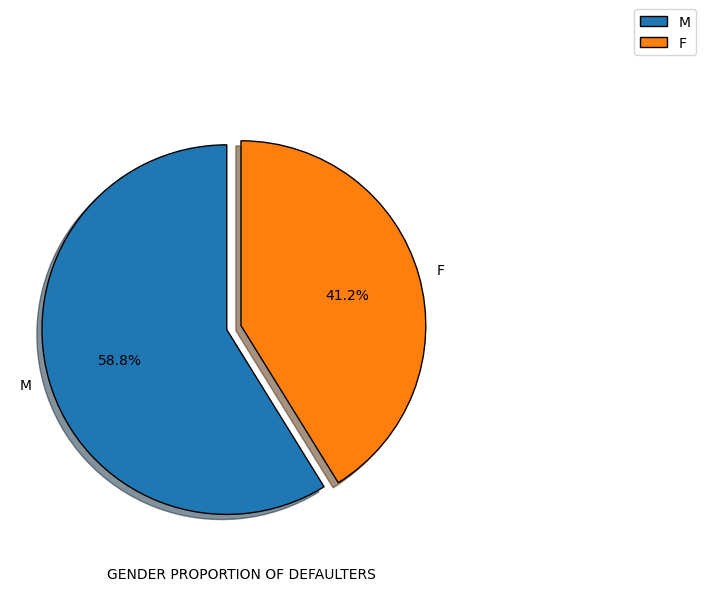

In [76]:
gen = [round(df_male,2),round(df_female,2)]
fig,ax = plt.subplots()
explode = [0.08,0]
label_full = ['M','F']
ax.pie(gen, wedgeprops = {'edgecolor': 'black'},shadow=True,startangle=90,autopct='%1.1f%%',explode=explode,labels=label_full);
ax.set_xlabel('GENDER PROPORTION OF DEFAULTERS');
ax.legend(loc='upper right',labels=label_full,bbox_to_anchor=(1.5,1.2));
plt.show();

In [77]:
df2['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

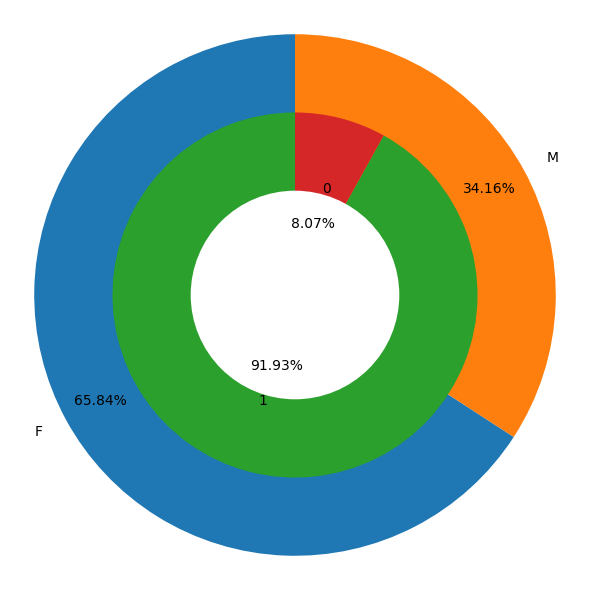

In [78]:
plt.figure(figsize=(6, 6)) # change the size of a figure
labels = ['F','M']
sizes = df2['CODE_GENDER'].value_counts()
labels_subgroup = df2['TARGET'].unique()    
sizes_subgroup = df2['TARGET'].value_counts()

 
outside_donut = plt.pie(sizes, labels=labels, 
 startangle=90, frame=True,
 autopct='%.2f%%',
 pctdistance =0.85) 
inside_donut = plt.pie(sizes_subgroup, labels=labels_subgroup,
 radius=0.7,
 startangle=90, labeldistance=0.6,
 autopct='%.2f%%',
 pctdistance =0.4) 
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

##### Splitting Dataframe with respect to Target(0/1)

In [79]:
target_0=df2.loc[df2['TARGET'] == 0]     #has all the data of consumers that have taget variable=0
target_1=df2.loc[df2['TARGET'] == 1]     #has all the data of consumers that have taget variable=1

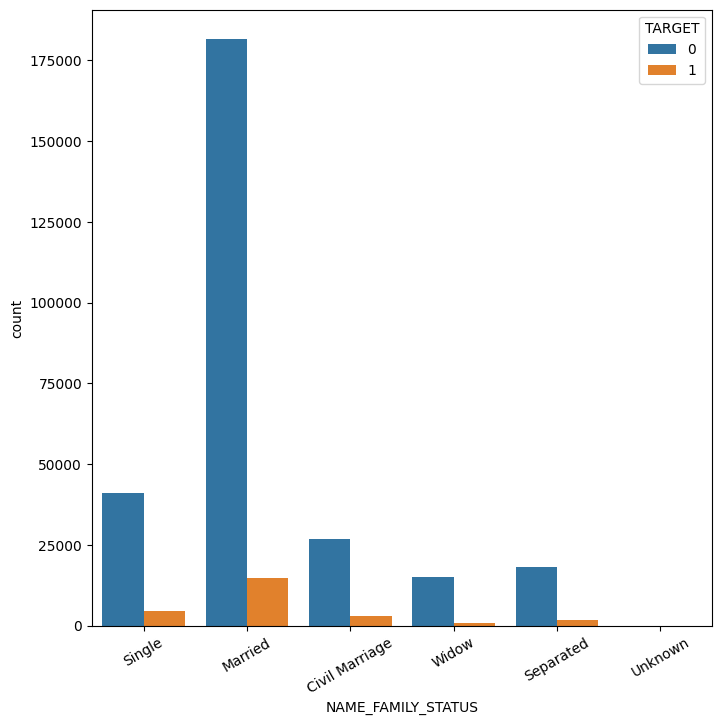

In [90]:
lab = ['Single','Married','Civil Marriage','Widow','Separated','Unknown']
fig,ax = plt.subplots(figsize=[8,8])
sns.countplot(x ='NAME_FAMILY_STATUS', hue = "TARGET", data = df2)
ax.set_xticklabels(labels = lab, rotation=30);
plt.show()

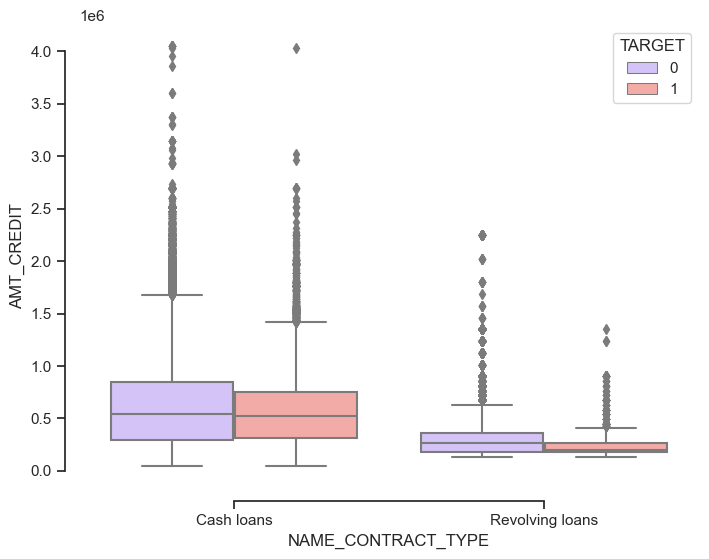

In [92]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT",
            hue="TARGET", palette=["m", "r"],
            data=df2)
sns.despine(offset=10, trim=True)
plt.show()

##### Amount of credit taken by people of respective family status 

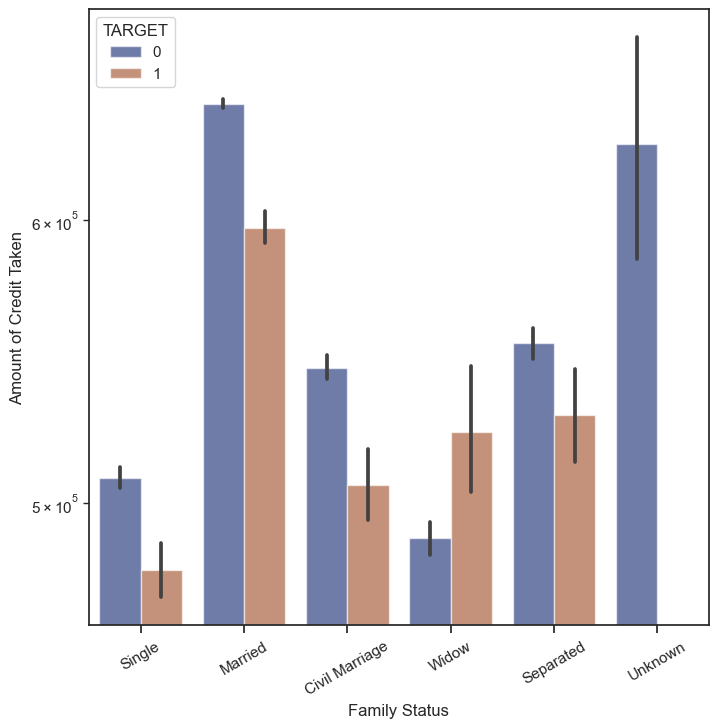

In [94]:
fig,ax = plt.subplots(figsize=(8,8))
lab =['Single','Married','Civil Marriage','Widow','Separated','Unknown']
ax = sns.barplot(data=df2,x="NAME_FAMILY_STATUS", y="AMT_CREDIT", hue="TARGET", palette="dark", alpha=.6,log=True)
ax.set_xticklabels(labels= lab,rotation=30);
ax.set_xlabel("Family Status")
ax.set_ylabel("Amount of Credit Taken")
plt.show()

##### Most of the defaulters are married

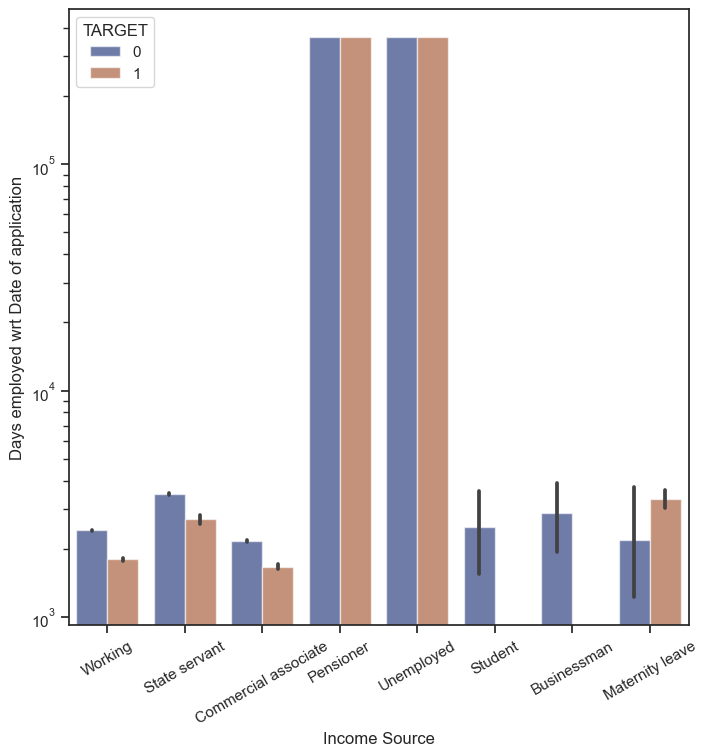

In [97]:
fig,ax = plt.subplots(figsize=(8,8))
lab =['Working','State servant','Commercial associate','Pensioner','Unemployed','Student','Businessman','Maternity leave']
ax = sns.barplot(data=df2,x="NAME_INCOME_TYPE", y="DAYS_EMPLOYED", hue="TARGET", palette="dark", alpha=.6,log=True)
ax.set_xticklabels(labels= lab,rotation=30);
ax.set_xlabel("Income Source")
ax.set_ylabel("Days employed wrt Date of application")

plt.show()

##### Pensioners and Umemployed have obviously highest days from their first day of employment.Students and Businessman do not seem to have defaulter population

In [98]:
df_temp = df2.loc[((df2['NAME_INCOME_TYPE'].notnull())&(df2['TARGET'] ==1))] [['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER', 'NAME_INCOME_TYPE','ORGANIZATION_TYPE', 'AMT_CREDIT','DAYS_EMPLOYED']]

In [99]:
df_temp.head(20).sort_values(by='AMT_CREDIT',ascending=False)

TARGET NAME_CONTRACT_TYPE CODE_GENDER      NAME_INCOME_TYPE  \
235       1         Cash loans           F               Working   
40        1         Cash loans           M  Commercial associate   
255       1         Cash loans           M  Commercial associate   
26        1         Cash loans           F               Working   
94        1         Cash loans           M  Commercial associate   
110       1         Cash loans           F  Commercial associate   
138       1         Cash loans           M               Working   
261       1         Cash loans           M               Working   
180       1    Revolving loans           M  Commercial associate   
211       1         Cash loans           F               Working   
184       1         Cash loans           F  Commercial associate   
260       1         Cash loans           M  Commercial associate   
0         1         Cash loans           M               Working   
42        1         Cash loans           F               Working   
283       1         Cash loans           M             Pensioner   
246       1         Cash loans           M               Working   
81        1         Cash loans           F             Pensioner   
154       1         Cash loans           F               Working   
163       1         Cash loans           F  Commercial associate   
242       1    Revolving loans           F  Commercial associate   

          ORGANIZATION_TYPE  AMT_CREDIT  DAYS_EMPLOYED  
235                   Other   1710000.0           9274  
40   Business Entity Type 3   1193580.0           1262  
255  Business Entity Type 3   1019205.0            602  
26   Business Entity Type 3    979992.0           2628  
94         Industry: type 4    953460.0           2015  
110           Trade: type 2    723996.0            267  
138  Business Entity Type 3    675000.0            200  
261  Business Entity Type 3    571486.5            166  
180            Construction    540000.0           1038  
211           Self-employed    495216.0            154  
184  Business Entity Type 3    436032.0            111  
260           Trade: type 3    426645.0           1572  
0    Business Entity Type 3    406597.5            637  
42            Self-employed    288873.0           3597  
283                     XNA    284400.0         365243  
246  Business Entity Type 3    263686.5            448  
81                      XNA    252000.0         365243  
154  Business Entity Type 3    245619.0           7676  
163           Trade: type 3    225000.0            150  
242               Insurance    135000.0            146

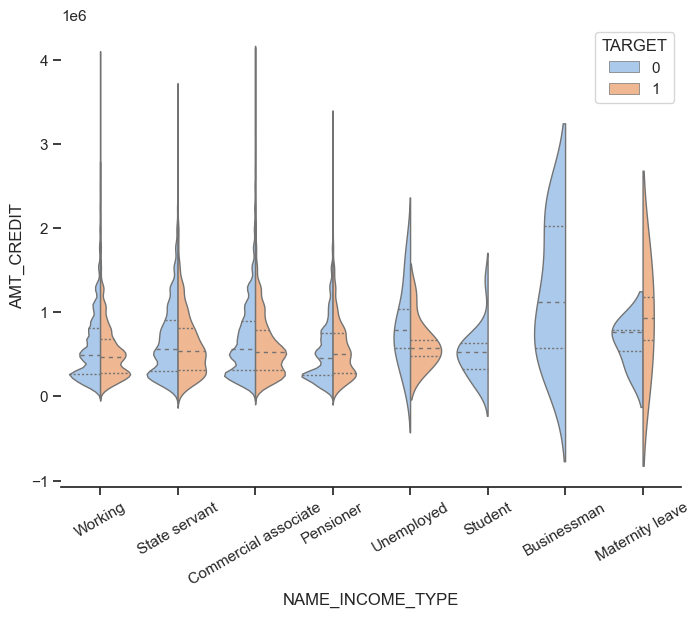

In [102]:
lab = ['Working','State servant', 'Commercial associate', 'Pensioner', 'Unemployed',
 'Student', 'Businessman', 'Maternity leave']
ax = sns.violinplot(data=df2, x="NAME_INCOME_TYPE", y="AMT_CREDIT", hue="TARGET",
               split=True, inner="quart", linewidth=1)
ax.set_xticklabels(labels = lab, rotation=30);
sns.despine(left=True)

In [103]:
def find_correlation(df):
    corr = df.corr()

    # Generate a mask for the upper triangle; True = do NOT show
    mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros with the same shape and type of corr.
    mask[np.triu_indices_from(mask)] = True # return indexes of upper triangle of array 

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(
        corr,          # The data to plot
        mask=mask,     # Mask some cells
        cmap=cmap,     # What colors to plot the heatmap as
        annot=True,    # Should the values be plotted in the cells?
        vmax=.3,       # The maximum value of the legend. All higher vals will be same color
        vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
        center=0,      # The center value of the legend. With divergent cmap, where white is
        square=False,   # Force cells to be square
        linewidths=.5, # Width of lines that divide cells
        cbar_kws={"shrink": .8}  # Extra kwargs for the legend; in this case, shrink by 50%
        );

In [104]:
df_temp1 = df2[['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']]

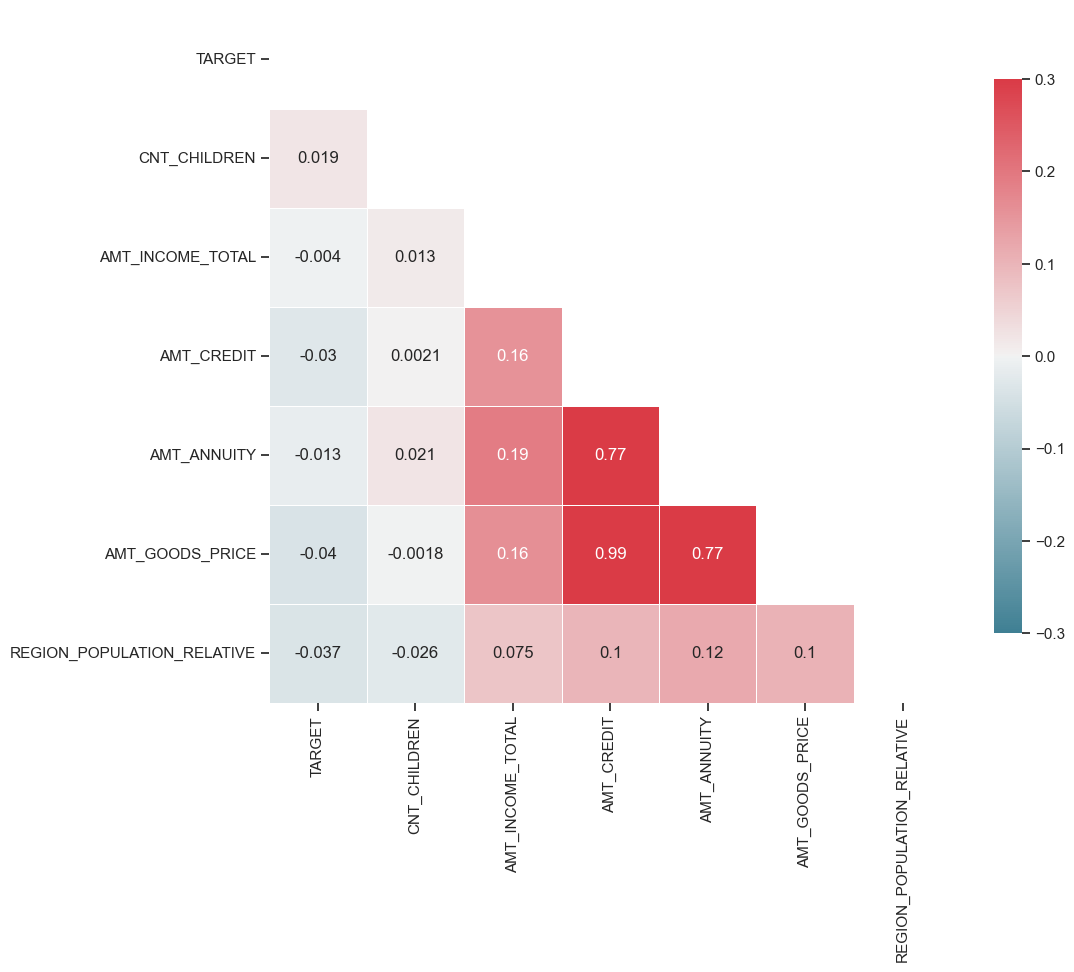

In [105]:
find_correlation(df_temp1)

In [106]:
df_temp = df2[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

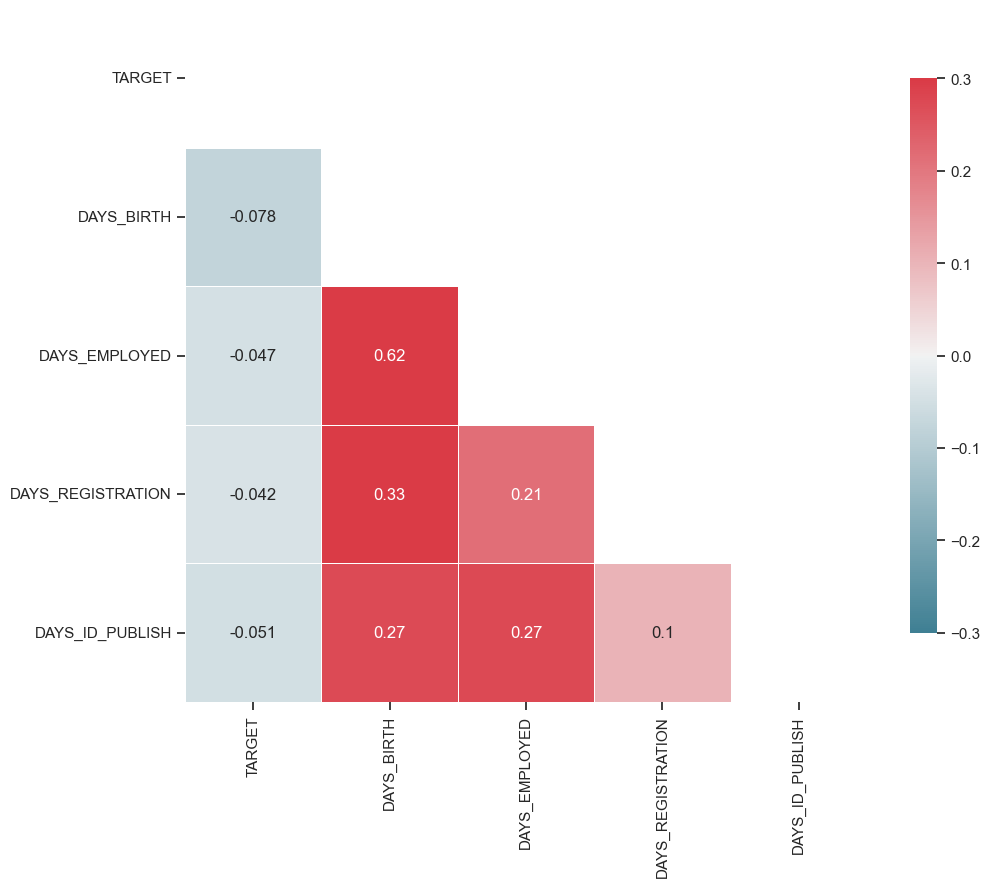

In [107]:
find_correlation(df_temp)

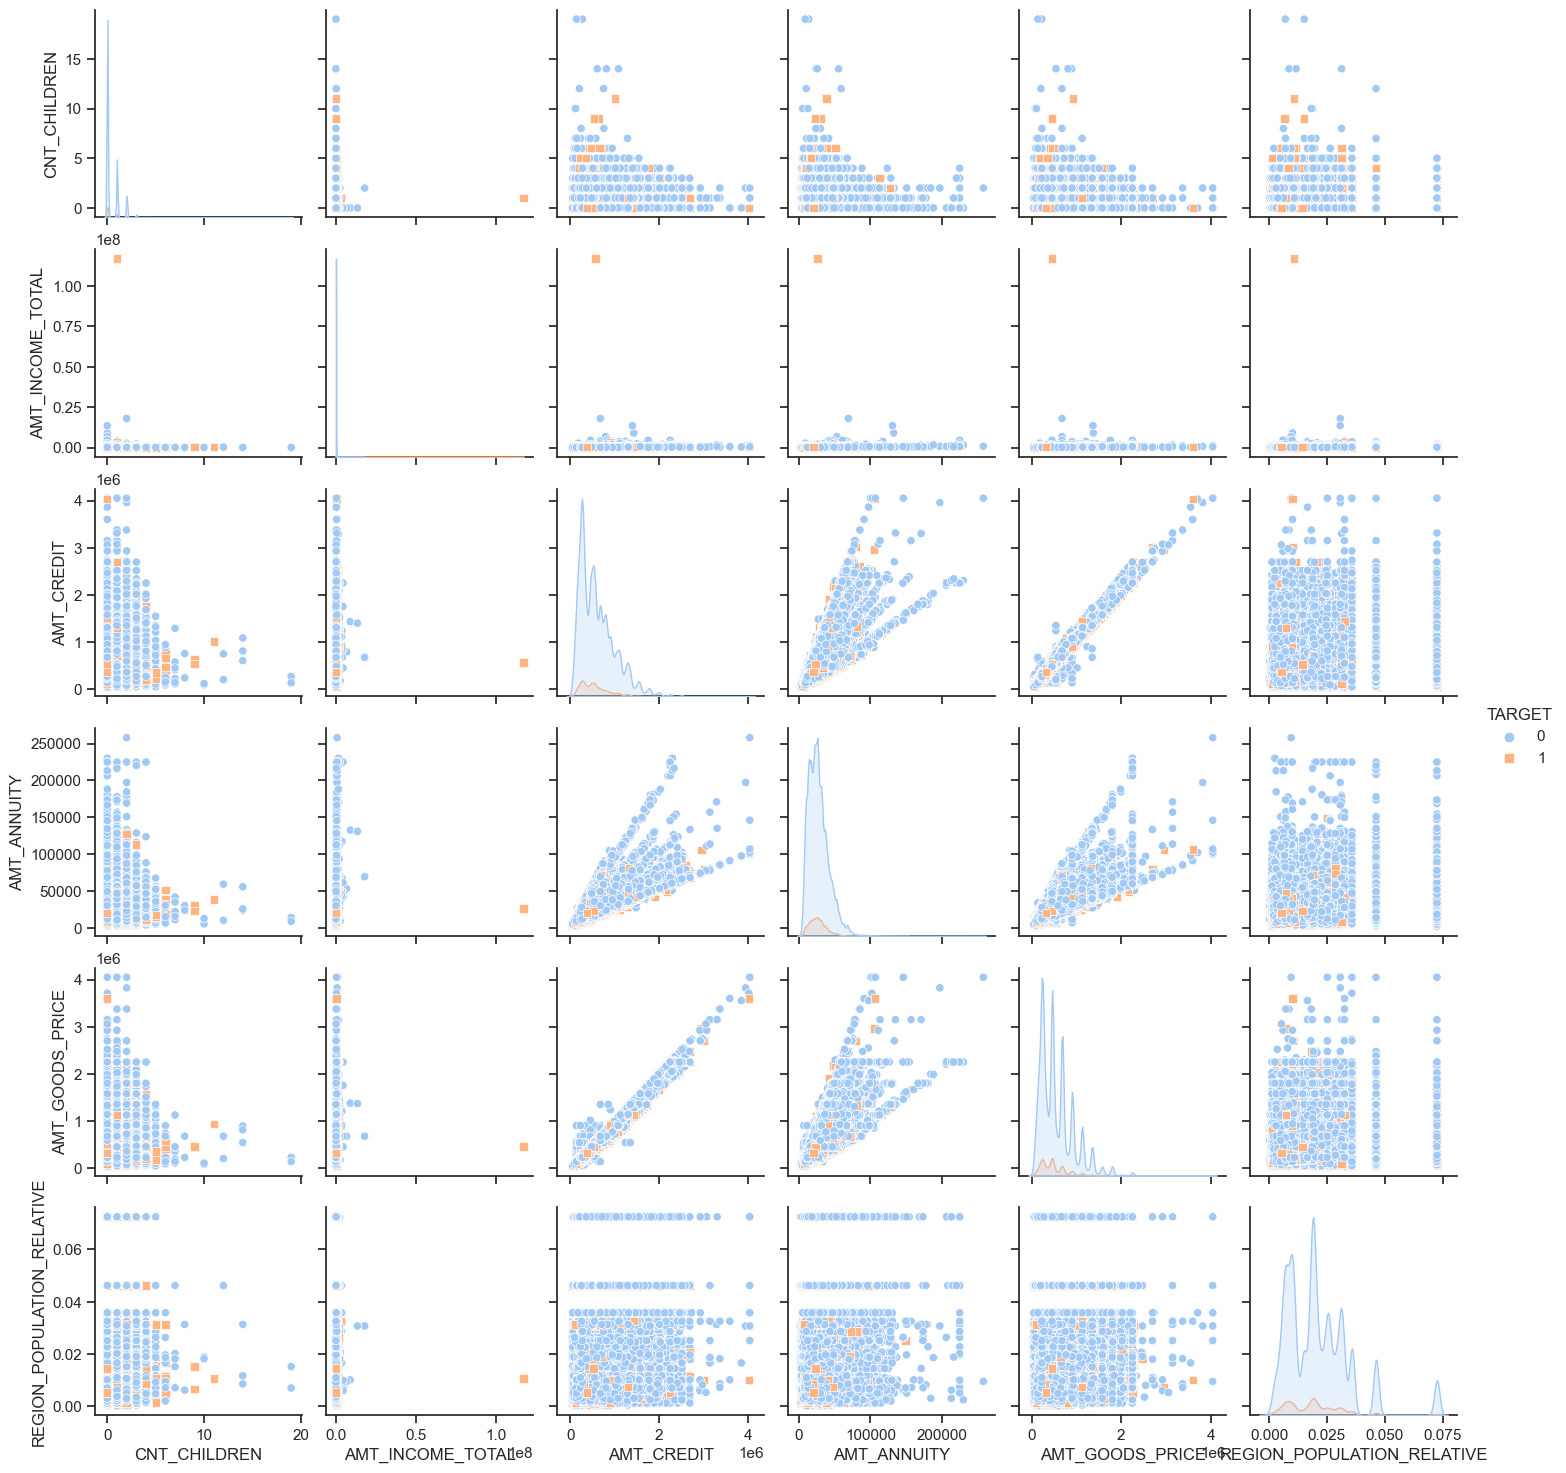

In [75]:
sns.pairplot(df_temp1,  hue ="TARGET", markers=["o", "s"])
plt.show()

In [108]:
numeric_columns=df2.select_dtypes(include=['int64','float64'])


In [109]:
numeric_columns.head(2)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801        9461   
1      35698.5        1129500.0                    0.003541       16765   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0            637               3648             2120           1   
1           1188               1186              291           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.262949                         2                         2   
1      0.622246                         1                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                    1134   
1                         1                         0                     828   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   AGE_OF_APPLICANT  
0             25.92  
1             45.93

In [110]:
df_credit_corr = df2[numeric_columns.columns].corr(method="spearman")

In [111]:
df_credit_corr.head()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR          1.000000 -0.002111     -0.000787          0.002160   
TARGET             -0.002111  1.000000      0.020074         -0.018104   
CNT_CHILDREN       -0.000787  0.020074      1.000000          0.034464   
AMT_INCOME_TOTAL    0.002160 -0.018104      0.034464          1.000000   
AMT_CREDIT          0.000117 -0.017537      0.001656          0.411876   

                  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR          0.000117     0.000371         0.000515   
TARGET             -0.017537    -0.000077        -0.031508   
CNT_CHILDREN        0.001656     0.025447        -0.002527   
AMT_INCOME_TOTAL    0.411876     0.481577         0.415352   
AMT_CREDIT          1.000000     0.830209         0.983926   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                          0.000868    0.001610       0.001359   
TARGET                             -0.030562   -0.078328      -0.086573   
CNT_CHILDREN                       -0.026705   -0.367441      -0.200128   
AMT_INCOME_TOTAL                    0.094418   -0.083973      -0.088961   
AMT_CREDIT                          0.052884    0.066139       0.024802   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
SK_ID_CURR                 0.001321         0.000190    0.002804   
TARGET                    -0.040171        -0.052535    0.000534   
CNT_CHILDREN              -0.177285         0.019443    0.001163   
AMT_INCOME_TOTAL          -0.072487        -0.031809    0.000896   
AMT_CREDIT                -0.006601         0.006728    0.001473   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
SK_ID_CURR             -0.001335        -0.000414          0.002818   
TARGET                  0.045982         0.028524          0.000370   
CNT_CHILDREN            0.268037         0.051596         -0.001510   
AMT_INCOME_TOTAL        0.194805        -0.058730         -0.009074   
AMT_CREDIT              0.070129        -0.033481          0.029115   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
SK_ID_CURR          0.002755    0.000277        -0.002660   
TARGET             -0.023806   -0.001758         0.007010   
CNT_CHILDREN       -0.035105    0.026963         0.811556   
AMT_INCOME_TOTAL   -0.012705    0.096334         0.041524   
AMT_CREDIT          0.016435    0.014868         0.078226   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                   -0.001101                    -0.001149   
TARGET                        0.058909                     0.060936   
CNT_CHILDREN                  0.022577                     0.021072   
AMT_INCOME_TOTAL             -0.205784                    -0.225701   
AMT_CREDIT                   -0.085239                    -0.094840   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                       0.000483                   -0.000287   
TARGET                          -0.022914                    0.005576   
CNT_CHILDREN                    -0.000736                   -0.011973   
AMT_INCOME_TOTAL                 0.101610                    0.078066   
AMT_CREDIT                       0.049997                    0.018515   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                          0.001095                     0.002901   
TARGET                              0.006942                     0.002819   
CNT_CHILDREN                        0.012547                     0.018921   
AMT_INCOME_TOTAL                    0.160770                     0.148512   
AMT_CREDIT                          0.043974                     0.046414   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                     -0.001885               -0.001583   
TARGET                          0.044395                0.050994   
CNT_CHILDREN 

In [112]:
dict_corr = {"Variable1": [], "Variable2": [], "Correlation": []}
columns = list(df_credit_corr.columns)
for i, column in enumerate(columns):
    #print("aa",i,column)
    if i==len(columns):
        break
    for j, column2 in enumerate(columns[i+1:]):
        if ("_".join(column.split("_")[:-1])=="_".join(column2.split("_")[:-1])) and ((column.split("_")[-1]=="MEDI") or (column.split("_")[-1]=="AVG") or (column.split("_")[-1]=="MODE")) and ((column2.split("_")[-1]=="MEDI") or (column2.split("_")[-1]=="AVG") or (column2.split("_")[-1]=="MODE")):
            pass
        else:         
            dict_corr["Variable1"].append(column)
            dict_corr["Variable2"].append(column2)
            if np.isnan(df_credit_corr[column][column2]):
                dict_corr["Correlation"].append(0.)
            else:
                dict_corr["Correlation"].append(df_credit_corr[column][column2])

In [113]:
df_credit_corr_disp = pd.DataFrame(dict_corr)

In [114]:
df_credit_corr_disp[(df_credit_corr_disp.Correlation>=0.3) | (df_credit_corr_disp.Correlation<-0.3)].sort_values(by=["Correlation"], ascending=False)

Variable1                    Variable2  Correlation
449                    DAYS_BIRTH             AGE_OF_APPLICANT     1.000000
1161     OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.997337
211                    AMT_CREDIT              AMT_GOODS_PRICE     0.983926
855          REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.950041
989    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION     0.860627
1186     DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE     0.845159
210                    AMT_CREDIT                  AMT_ANNUITY     0.830209
260                   AMT_ANNUITY              AMT_GOODS_PRICE     0.826933
1079       REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY     0.825575
122                  CNT_CHILDREN              CNT_FAM_MEMBERS     0.811556
404                    DAYS_BIRTH                DAYS_EMPLOYED     0.577852
494                 DAYS_EMPLOYED             AGE_OF_APPLICANT     0.577852
160              AMT_INCOME_TOTAL                  AMT_ANNUITY     0.481577
957    REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.450804
1050       REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY     0.440409
161              AMT_INCOME_TOTAL              AMT_GOODS_PRICE     0.415352
159              AMT_INCOME_TOTAL                   AMT_CREDIT     0.411876
478                 DAYS_EMPLOYED              FLAG_DOCUMENT_6     0.406384
1364              FLAG_DOCUMENT_6             AGE_OF_APPLICANT     0.392842
433                    DAYS_BIRTH              FLAG_DOCUMENT_6     0.392842
1185     DEF_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.381686
1160     OBS_30_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE     0.379586
959    REG_REGION_NOT_LIVE_REGION       REG_CITY_NOT_LIVE_CITY     0.339232
1209     OBS_60_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE     0.307551
1162     OBS_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE     0.305494
897   REGION_RATING_CLIENT_W_CITY                 EXT_SOURCE_2    -0.316612
863          REGION_RATING_CLIENT                 EXT_SOURCE_2    -0.322237
112                  CNT_CHILDREN                   DAYS_BIRTH    -0.367441
158                  CNT_CHILDREN             AGE_OF_APPLICANT    -0.367441
368    REGION_POPULATION_RELATIVE         REGION_RATING_CLIENT    -0.418982
369    REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY    -0.426774
1299              FLAG_DOCUMENT_3              FLAG_DOCUMENT_8    -0.465730
1297              FLAG_DOCUMENT_3              FLAG_DOCUMENT_6    -0.486238
648                FLAG_EMP_PHONE              FLAG_DOCUMENT_6    -0.597732
408                    DAYS_BIRTH               FLAG_EMP_PHONE    -0.599551
664                FLAG_EMP_PHONE             AGE_OF_APPLICANT    -0.599551
453                 DAYS_EMPLOYED               FLAG_EMP_PHONE    -0.667443

In [115]:
corr_matrix = df2.corr()
print(corr_matrix["TARGET"].sort_values(ascending=False))

TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
DEF_60_CNT_SOCIAL_CIRCLE       0.031401
FLAG_WORK_PHONE                0.028524
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009312
OBS_30_CNT_SOCIAL_CIRCLE       0.009220
OBS_60_CNT_SOCIAL_CIRCLE       0.009109
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002819
FLAG_MOBIL                     0.000534
FLAG_CONT_MOBILE               0.000370
FLAG_DOCUMENT_20               0.000215
FLAG_DOCUMENT_5               -0.000316
FLAG_DOCUMENT_12              -0.000756


<AxesSubplot: >

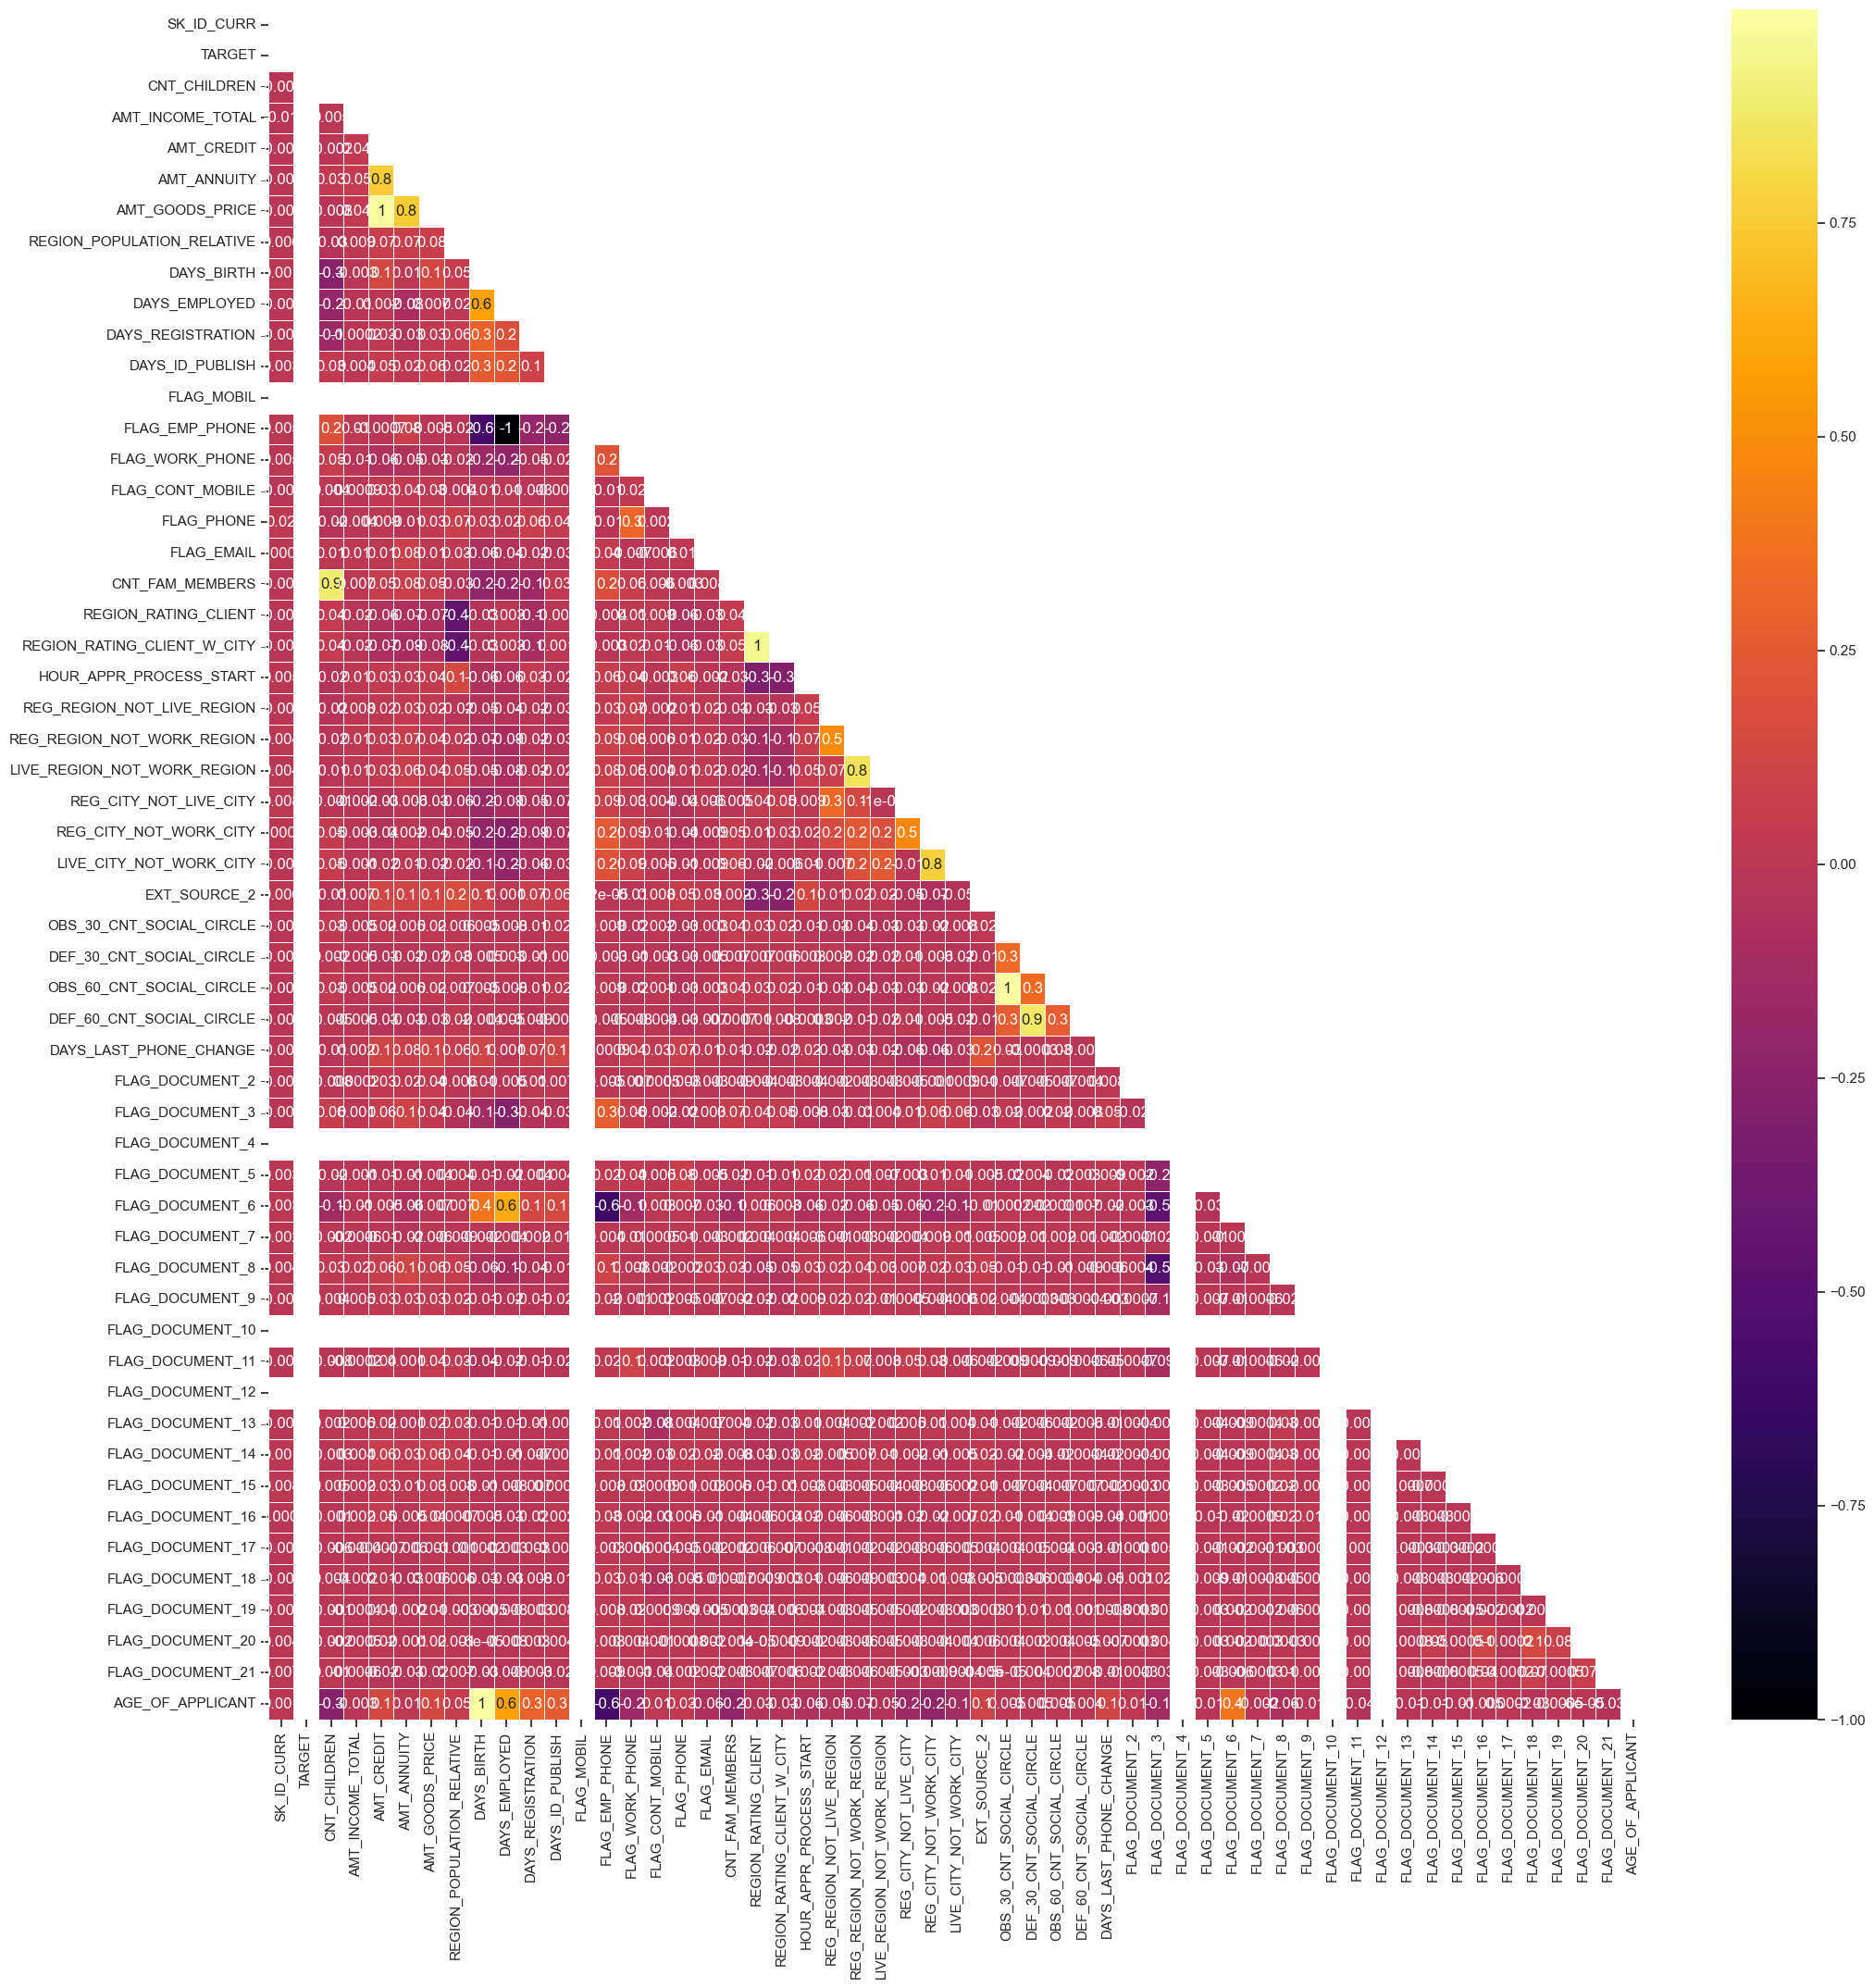

In [118]:
mask = np.zeros_like(target_1.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(target_1.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

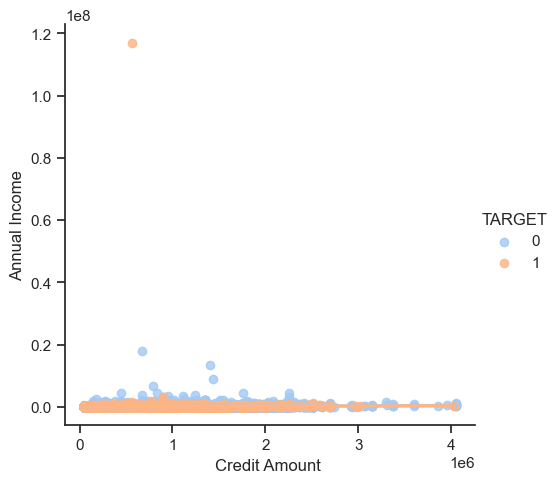

In [116]:
g = sns.lmplot(
    data=df2,
    x="AMT_CREDIT", y="AMT_INCOME_TOTAL", hue="TARGET",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Credit Amount ", "Annual Income")

#### Time Handling

In [120]:
df2.shape

(307511, 68)

##### Randomly generate Date of application from yr 2015 to yr 2018 as many other fields are dependent on the Date of Application and this date was missing in the data. So if we have this, date other dates can be generated from it.

In [121]:
import random
import time
import datetime

#daterange = df2.shape[0]

from dateutil.parser import parse
def str_time_prop(start, end, format, prop):
    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))
    ptime = stime + prop * (etime - stime)
    return time.strftime(format, time.localtime(ptime))

selected_format = '%Y-%m-%d %H:%M:%S'
def random_date(start, end, prop):
    return parse(str_time_prop(start, end, selected_format, prop)).strftime(selected_format)

print(random_date("2015-01-01 00:00:00", "2018-12-31 11:59:59", random.random()))
def make_date(x):
    start = "2015-01-01 00:00:00"
    end = "2018-12-31 11:59:59"
    return random_date(start,end, random.random())

2017-03-02 04:09:02


In [122]:
df2['DATE_OF_APPLICATION'] = df2['SK_ID_CURR'].apply(lambda x:make_date(x))

In [123]:
df2.to_csv("C:/vIDUSHI/SJSU/Data230 -Data Visualization/Project/df2_data_application.csv")

In [124]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [125]:
df2['DAYS_EMPLOYED'].mask(df2['DAYS_EMPLOYED'] == df2['DAYS_EMPLOYED'].max, 60874, inplace=True)

In [126]:
df2[df2['DAYS_EMPLOYED'] == df2['DAYS_EMPLOYED'].max()][:5]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8       100011       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
38      100045       0         Cash loans           F            N   
43      100050       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                Y             0        112500.000   1019610.0      33826.5   
11               Y             0         38419.155    148365.0      10678.5   
23               Y             0         83250.000    239850.0      23850.0   
38               Y             0         99000.000    247275.0      17338.5   
43               Y             0        108000.000    746280.0      42970.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8          913500.0        Children        Pensioner   
11         135000.0        Children        Pensioner   
23         225000.0   Unaccompanied        Pensioner   
38         225000.0   Unaccompanied        Pensioner   
43         675000.0   Unaccompanied        Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8   Secondary / secondary special               Married  House / apartment   
11  Secondary / secondary special               Married  House / apartment   
23  Secondary / secondary special               Married  House / apartment   
38  Secondary / secondary special               Married  House / apartment   
43               Higher education  Single / not married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
8                     0.018634       20099         365243               7427   
11                    0.015221       20417         365243               5246   
23                    0.006296       24827         365243               9012   
38                    0.006207       23920         365243               9817   
43                    0.010966       23548         365243               5745   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
8              3514           1               0                0   
11             2512           1               0                0   
23             3684           1               0                0   
38             4969           1               0                0   
43             4576           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
8                  1           0           0                2   
11                 1           1           0                2   
23                 1           1           0                2   
38                 1           1           0                2   
43                 1           0           0                1   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
8                      2                            2   
11                     2                            2   
23                     3                            3   
38                     2                            2   
43                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
8                   WEDNESDAY                       14   
11                     FRIDAY                        7   
23                     FRIDAY                       12   
38                     FRIDAY                       11   
43                  WEDNESDAY                        9   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
8                            0                           0   
11                           0                           0   
23                           0                           0   
38                           0                           0   
43                 

In [127]:
##### We need to replace the max value as it wasn't supported by Timestamp(ns)
df2.loc[df2["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = 60874



##### Calculate all the dates of the days field with respect to DATE OF APPLICATION

In [128]:
df2['DAY_OF_EMPLOYMENT'] = pd.to_datetime(df2['DATE_OF_APPLICATION']) - pd.to_timedelta(df2['DAYS_EMPLOYED'], unit='d')


In [129]:
df2['DAY_OF_REGISTRATION'] = pd.to_datetime(df2['DATE_OF_APPLICATION']) - pd.to_timedelta(df2['DAYS_REGISTRATION'], unit='d')

In [130]:
df2['DAY_OF_BIRTH'] = pd.to_datetime(df2['DATE_OF_APPLICATION']) - pd.to_timedelta(df2['DAYS_BIRTH'], unit='d')

In [131]:
df2['DAY_OF_IDPUBLISH'] = pd.to_datetime(df2['DATE_OF_APPLICATION']) - pd.to_timedelta(df2['DAYS_ID_PUBLISH'], unit='d')

In [132]:
df2['DAY_OF_PHONECHANGE'] = pd.to_datetime(df2['DATE_OF_APPLICATION']) - pd.to_timedelta(df2['DAYS_LAST_PHONE_CHANGE'], unit='d')

In [133]:
df2.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0                1   
1                 1           1           0                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.262949                         2                         2   
1      0.622246                         1                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                    1134   
1                         1                         0                     828   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   



##### Saving into file for later usage in Tableau.

In [134]:
df2.to_csv("C:/vIDUSHI/SJSU/Data230 -Data Visualization/Project/df2_datecolumns.csv")

In [135]:
df2 = pd.read_csv("C:/vIDUSHI/SJSU/Data230 -Data Visualization/Project/df2_datecolumns.csv")

In [136]:
df2 = df2.drop(columns=['Unnamed: 0'])
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0                1   
1                 1           1           0                2   
2                 1           1           0                1   
3                 1           0           0                2   
4                 1           0           0                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

##### Plotting 3D graph to see the pattern of Defaulters - In which income bracket they take how much annuity loan and live in how much relatively  populated area. 

In [145]:
target_1.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied          Working   
26         702000.0   Unaccompanied          Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637               3648   
26                    0.018029       18724           2628               6573   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120           1               1                0   
26             1827           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                  1           1           0                1   
26                 1           0           0                1   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                        0                        0  Business Entity Type 3   
26                       0                        0  Business Entity Type 3   

    EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0       0.262949                         2                         2   
26      0.548477                        10                         1   

    OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                          2                         2   
26                        10                         0   

    DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
0                     1134                0                1                0   
26                     161                0                1                0   

    FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  \
0                 0                0                0                0   
26                0                0                0                0   

    FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
0                 0                 0                 0                 0   
26                0                 0                 0                 0   

    FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
0                  0                 0                 0                 0   
26                 0                 0                 0                 1   

    FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0                  0                 0                 0                 0   
26                 0                 0                 0                 0   

In [146]:
by_income_credit = target_1.groupby(['ANNUAL_INCOME_RANGE'])['AMT_CREDIT'].agg([np.sum])
by_income_credit.columns = ['DefaulterAmountCredit']
by_income_credit['ANNUAL_INCOME_RANGE'] = by_income_credit.index
by_income_credit.set_index([pd.Index([0,1, 2, 3, 4])],inplace=True)

In [150]:
by_income_credit

DefaulterAmountCredit   ANNUAL_INCOME_RANGE
0           1.371319e+10            Low Income
1           1.215772e+08  Below average Income
2           8.383424e+06        Average Income
3           2.235726e+06  Above Average Income
4           1.462491e+06           High Income

In [147]:
by_income_pop = target_1.groupby(['ANNUAL_INCOME_RANGE'])['REGION_POPULATION_RELATIVE'].agg([np.sum])
by_income_pop.columns = ['DefaulterRelPopulation']
by_income_pop['ANNUAL_INCOME_RANGE'] = by_income_pop.index
by_income_pop.set_index([pd.Index([0,1, 2, 3, 4])],inplace=True)


In [151]:
by_income_pop

DefaulterRelPopulation   ANNUAL_INCOME_RANGE
0              471.054026            Low Income
1                3.541076  Below average Income
2                0.187212        Average Income
3                0.091514  Above Average Income
4                0.043204           High Income

In [148]:
##### Each category has mean value of that category
df_mean_inc = pd.DataFrame({'ANNUAL_INCOME_RANGE': ['Above Average Income', 'Average Income', 'Below average Income', 'High Income','Low Income'],
                    'value': [1750000, 1250000, 250000, 101000000,255000]})
df_mean_inc

ANNUAL_INCOME_RANGE      value
0  Above Average Income    1750000
1        Average Income    1250000
2  Below average Income     250000
3           High Income  101000000
4            Low Income     255000

In [152]:
df_merge = by_income_credit.merge(by_income_pop, how = 'left',on='ANNUAL_INCOME_RANGE')
df_merge

DefaulterAmountCredit   ANNUAL_INCOME_RANGE  DefaulterRelPopulation
0           1.371319e+10            Low Income              471.054026
1           1.215772e+08  Below average Income                3.541076
2           8.383424e+06        Average Income                0.187212
3           2.235726e+06  Above Average Income                0.091514
4           1.462491e+06           High Income                0.043204

In [153]:
df_merge = df_merge.merge(df_mean_inc, how = 'left',on='ANNUAL_INCOME_RANGE')
df_merge

DefaulterAmountCredit   ANNUAL_INCOME_RANGE  DefaulterRelPopulation  \
0           1.371319e+10            Low Income              471.054026   
1           1.215772e+08  Below average Income                3.541076   
2           8.383424e+06        Average Income                0.187212   
3           2.235726e+06  Above Average Income                0.091514   
4           1.462491e+06           High Income                0.043204   

       value  
0     255000  
1     250000  
2    1250000  
3    1750000  
4  101000000

In [154]:
# shift column 'ANNUAL_INCOME_RANGE	' to first position
first_column = df_merge.pop('ANNUAL_INCOME_RANGE')
  
# insert column using insert(position,column_name,
# first_column) function
df_merge.insert(0, 'ANNUAL_INCOME_RANGE', first_column)
df_merge

ANNUAL_INCOME_RANGE  DefaulterAmountCredit  DefaulterRelPopulation  \
0            Low Income           1.371319e+10              471.054026   
1  Below average Income           1.215772e+08                3.541076   
2        Average Income           8.383424e+06                0.187212   
3  Above Average Income           2.235726e+06                0.091514   
4           High Income           1.462491e+06                0.043204   

       value  
0     255000  
1     250000  
2    1250000  
3    1750000  
4  101000000

##### Normalize the varying values of columns of merge dataframe

In [155]:

df_merge.iloc[:,1:] = df_merge.iloc[:,1:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
df_merge['value'] = df_merge['value'].abs()
df_merge['DefaulterAmountCredit'] = df_merge['DefaulterAmountCredit'].abs()
df_merge['DefaulterRelPopulation'] = df_merge['DefaulterRelPopulation'].abs()
print(df_merge)



    ANNUAL_INCOME_RANGE  DefaulterAmountCredit  DefaulterRelPopulation  \
0            Low Income               1.788792                1.788810   
1  Below average Income               0.432788                0.434953   
2        Average Income               0.451289                0.450906   
3  Above Average Income               0.452294                0.451361   
4           High Income               0.452421                0.451591   

      value  
0  0.461040  
1  0.461151  
2  0.438821  
3  0.427655  
4  1.788667  


##### Plot 3D graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


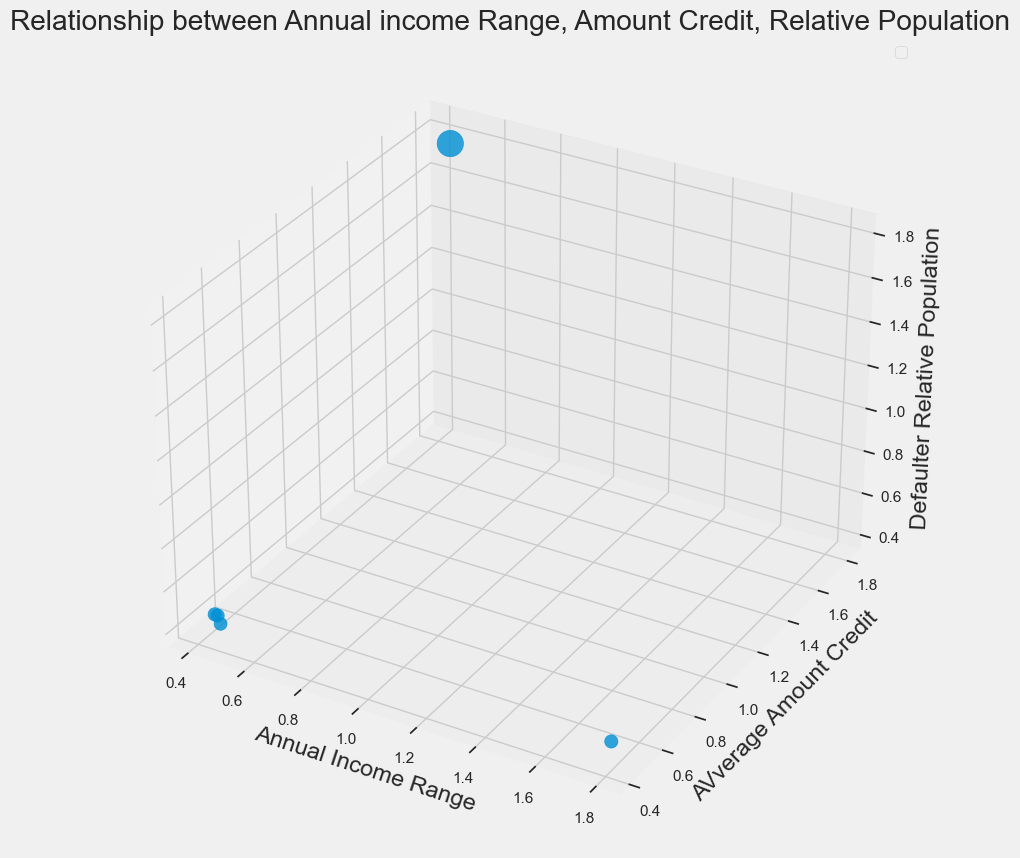

In [156]:

color = ['r','g','b','y','o']
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(df_merge['value'], df_merge['DefaulterAmountCredit'], df_merge['DefaulterRelPopulation'],
              s = df_merge['DefaulterAmountCredit']*200, alpha = 0.8) 

ax.set_xlabel("Annual Income Range")
ax.set_ylabel("AVverage Amount Credit")
ax.set_zlabel("Defaulter Relative Population")
ax.legend()
ax.set_title("Relationship between Annual income Range, Amount Credit, Relative Population");
plt.show();

#### Binning, Weight of Evidence (WoE), Information Value (IV) 
##### Binning create buckets of independent variables based on ranking methods. Binning helps us converting continuous variables into categorical ones. This process allows us to understand feature performance better. The insights from this part of the analysis can be useful in devising portfolio risk strategies. One simple binning example using "age" is given below for illustration.
##### Weight of Evidence (WoE) will help us to determine which categories should be binned together. WOE measures the strength of a bin in differentiating the Good and Bad accounts. WOE < 0 indicates that the variable bin is captures higher proportion of bad accounts.
##### Information Value (IV) will help in determining which variables are useful for prediction in the logistic regression model. IV is the measure of overall predictive power of the variables and is very useful for feature selection.
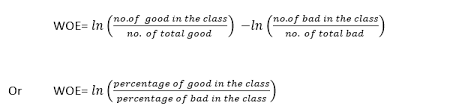
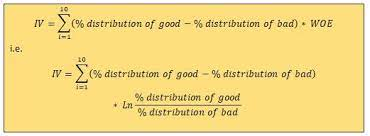

In [157]:
#function to calculate Weight of Evidence (WoE) and Information Value (IV)

def informationvalue_woe(data, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    #Run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)
            
    return newDF, woeDF

iv, woe = informationvalue_woe(df2, target='TARGET', bins=20)

#### RULE OF THUMB for Information Values(IV)
##### IV <0.02 - NOT USEFUL
##### IV 0.02 - 0.03 - WEAK PREDICTOR
##### IV 0.01 - 0.05 - MEDIUM PREDICTOR
##### IV > 0.05 - SUSPICIOUS

In [114]:
woe

Variable                  Cutoff      N  Events  \
0               SK_ID_CURR  (100001.999, 117945.5]  15376    1205   
1               SK_ID_CURR    (117945.5, 135692.0]  15376    1259   
2               SK_ID_CURR    (135692.0, 153437.5]  15375    1259   
3               SK_ID_CURR    (153437.5, 171327.0]  15376    1205   
4               SK_ID_CURR    (171327.0, 189145.5]  15375    1244   
...                    ...                     ...    ...     ...   
307352  DAY_OF_PHONECHANGE     2018-12-31 08:45:38      1       0   
307353  DAY_OF_PHONECHANGE     2018-12-31 09:54:25      1       0   
307354  DAY_OF_PHONECHANGE     2018-12-31 10:50:48      1       0   
307355  DAY_OF_PHONECHANGE     2018-12-31 11:05:19      1       0   
307356  DAY_OF_PHONECHANGE     2018-12-31 11:14:41      1       0   

        % of Events  Non-Events  % of Non-Events       WoE            IV  
0          0.048540       14171         0.050130 -0.032233  5.125125e-05  
1          0.050715       14117         0.049939  0.015424  1.197181e-05  
2          0.050715       14116         0.049935  0.015494  1.208161e-05  
3          0.048540       14171         0.050130 -0.032233  5.125125e-05  
4          0.050111       14131         0.049988  0.002447  2.995792e-07  
...             ...         ...              ...       ...           ...  
307352     0.000020           1         0.000004  1.739338  2.887909e-05  
307353     0.000020           1         0.000004  1.739338  2.887909e-05  
307354     0.000020           1         0.000004  1.739338  2.887909e-05  
307355     0.000020           1         0.000004  1.739338  2.887909e-05  
307356     0.000020           1         0.000004  1.739338  2.887909e-05  

[1844743 rows x 9 columns]

In [158]:
df_selected = df2.copy()
#drop columns with low IV < 0.001
df_selected.drop(columns=[ 'FLAG_OWN_REALTY', 'SK_ID_CURR', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 
                              'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',  'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                              'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7', 
                          'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_15','FLAG_DOCUMENT_17',
                         'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis=1, inplace=True)

In [159]:
df_selected.drop(columns=[ 'FLAG_PHONE', 'FLAG_OWN_CAR', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16','FLAG_DOCUMENT_14', 
                             'CNT_CHILDREN','NAME_TYPE_SUITE','ANNUAL_INCOME_RANGE' ], axis=1, inplace=True)

In [160]:
iv, woe = informationvalue_woe(df_selected, target='TARGET', bins=20)

In [161]:
iv.sort_values(by='IV',ascending=False)

Variable         IV
0                 DAY_OF_BIRTH  11.150378
0          DAY_OF_REGISTRATION  11.149613
0            DAY_OF_EMPLOYMENT  11.148973
0             DAY_OF_IDPUBLISH  11.146564
0           DAY_OF_PHONECHANGE  11.143616
0          DATE_OF_APPLICATION  11.135746
0                 EXT_SOURCE_2   0.318523
0                DAYS_EMPLOYED   0.111433
0              AMT_GOODS_PRICE   0.102623
0                   DAYS_BIRTH   0.086236
0             AGE_OF_APPLICANT   0.086220
0                 AGE_CATEGORY   0.080087
0            ORGANIZATION_TYPE   0.073368
0             NAME_INCOME_TYPE   0.058381
0                   AMT_CREDIT   0.052786
0  REGION_RATING_CLIENT_W_CITY   0.051201
0          NAME_EDUCATION_TYPE   0.050836
0         REGION_RATING_CLIENT   0.048317
0       DAYS_LAST_PHONE_CHANGE   0.047936
0   REGION_POPULATION_RELATIVE   0.045494
0              DAYS_ID_PUBLISH   0.039762
0                  CODE_GENDER   0.038601
0               FLAG_EMP_PHONE   0.032907
0       REG_CITY_NOT_WORK_CITY   0.032207
0                  AMT_ANNUITY   0.031594
0              FLAG_DOCUMENT_3   0.028579
0            DAYS_REGISTRATION   0.028274
0       REG_CITY_NOT_LIVE_CITY   0.022299
0           NAME_FAMILY_STATUS   0.021711
0            NAME_HOUSING_TYPE   0.015730
0           NAME_CONTRACT_TYPE   0.015039
0     DEF_30_CNT_SOCIAL_CIRCLE   0.013312
0      LIVE_CITY_NOT_WORK_CITY   0.013228
0              FLAG_DOCUMENT_6   0.012824
0     DEF_60_CNT_SOCIAL_CIRCLE   0.012207
0             AMT_INCOME_TOTAL   0.011789
0      HOUR_APPR_PROCESS_START   0.010449
0              FLAG_WORK_PHONE   0.010329

In [162]:
df_selected.select_dtypes(include=['O']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'ORGANIZATION_TYPE', 'AGE_CATEGORY', 'DATE_OF_APPLICATION',
       'DAY_OF_EMPLOYMENT', 'DAY_OF_REGISTRATION', 'DAY_OF_BIRTH',
       'DAY_OF_IDPUBLISH', 'DAY_OF_PHONECHANGE'],
      dtype='object')

In [163]:
# dummy variables for cat cols
data_dummies = [pd.get_dummies(df_selected['NAME_CONTRACT_TYPE'], prefix='NAME_CONTRACT_TYPE', prefix_sep=':'),
                 pd.get_dummies(df_selected['CODE_GENDER'], prefix='CODE_GENDER', prefix_sep=':'),
                 pd.get_dummies(df_selected['NAME_INCOME_TYPE'], prefix='NAME_INCOME_TYPE', prefix_sep=':'),
                 pd.get_dummies(df_selected['NAME_EDUCATION_TYPE'], prefix='NAME_EDUCATION_TYPE', prefix_sep=':'),
                 pd.get_dummies(df_selected['NAME_FAMILY_STATUS'], prefix='NAME_FAMILY_STATUS', prefix_sep=':'),
                 pd.get_dummies(df_selected['NAME_HOUSING_TYPE'], prefix='NAME_HOUSING_TYPE', prefix_sep=':'),
                 pd.get_dummies(df_selected['ORGANIZATION_TYPE'], prefix='ORGANIZATION_TYPE', prefix_sep=':'),
                 pd.get_dummies(df_selected['AGE_CATEGORY'], prefix='AGE_CATEGORY', prefix_sep=':'),
                 ]

In [164]:
categorical_dummies = pd.concat(data_dummies, axis=1)

In [165]:
def weight_of_evidence_categorical(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [166]:
# function to plot WoE
import numpy as np

def plot_by_weight_of_evidence(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 12))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels) 
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [167]:
#seperating data into target and features
X= df_selected.drop(columns='TARGET', axis=1)
y=df_selected['TARGET']

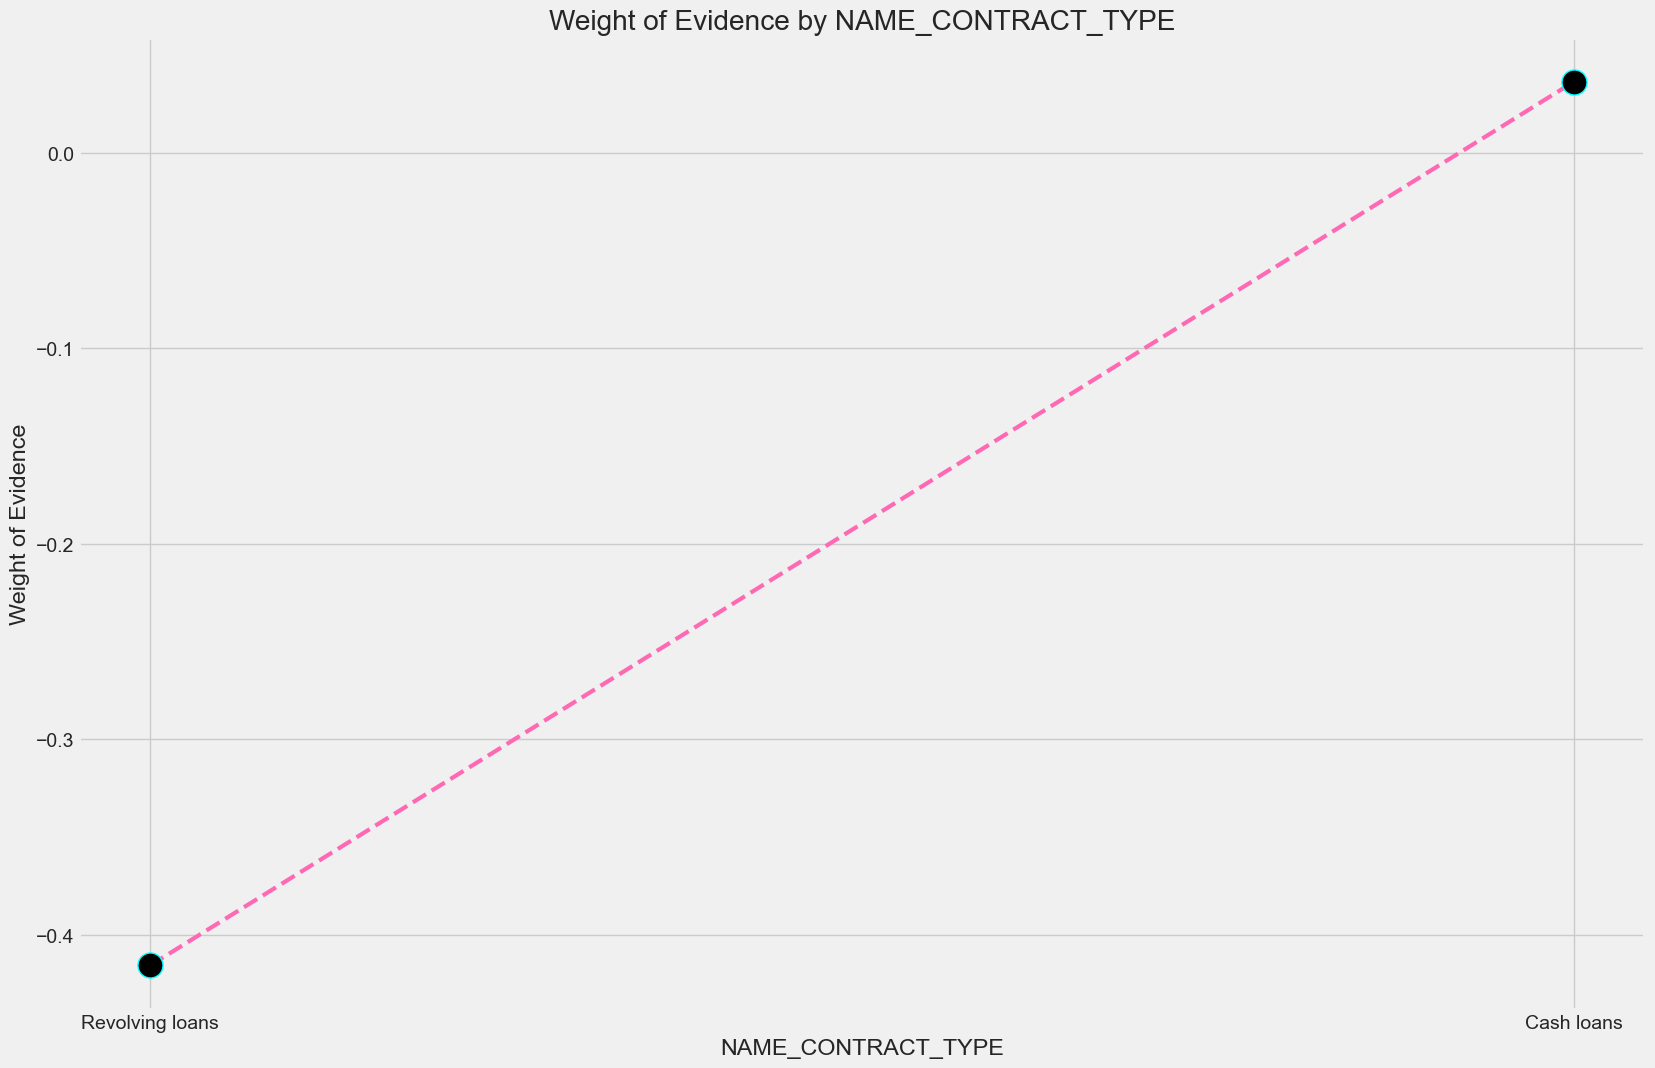

In [168]:
df_grade = weight_of_evidence_categorical(X, 'NAME_CONTRACT_TYPE', y)
plot_by_weight_of_evidence(df_grade)

#### We can use this to separate the target

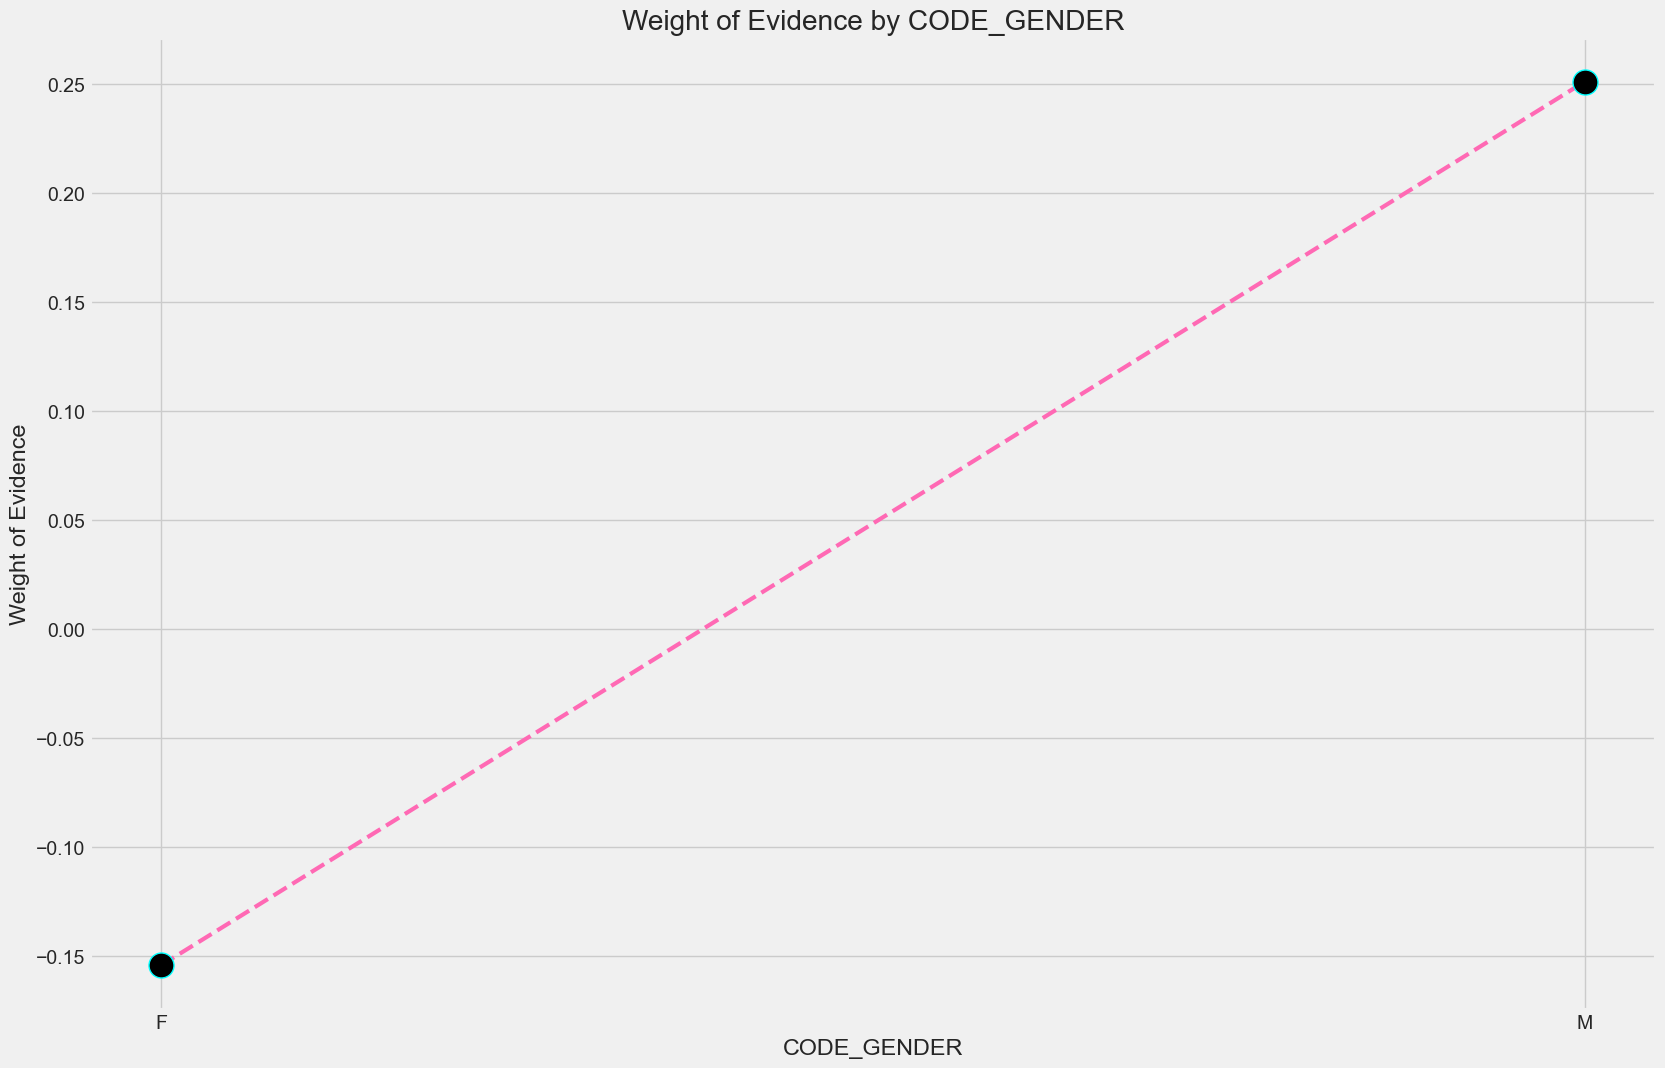

In [169]:
df_grade = weight_of_evidence_categorical(X, 'CODE_GENDER', y)
plot_by_weight_of_evidence(df_grade)

#### We can use this to separate the target

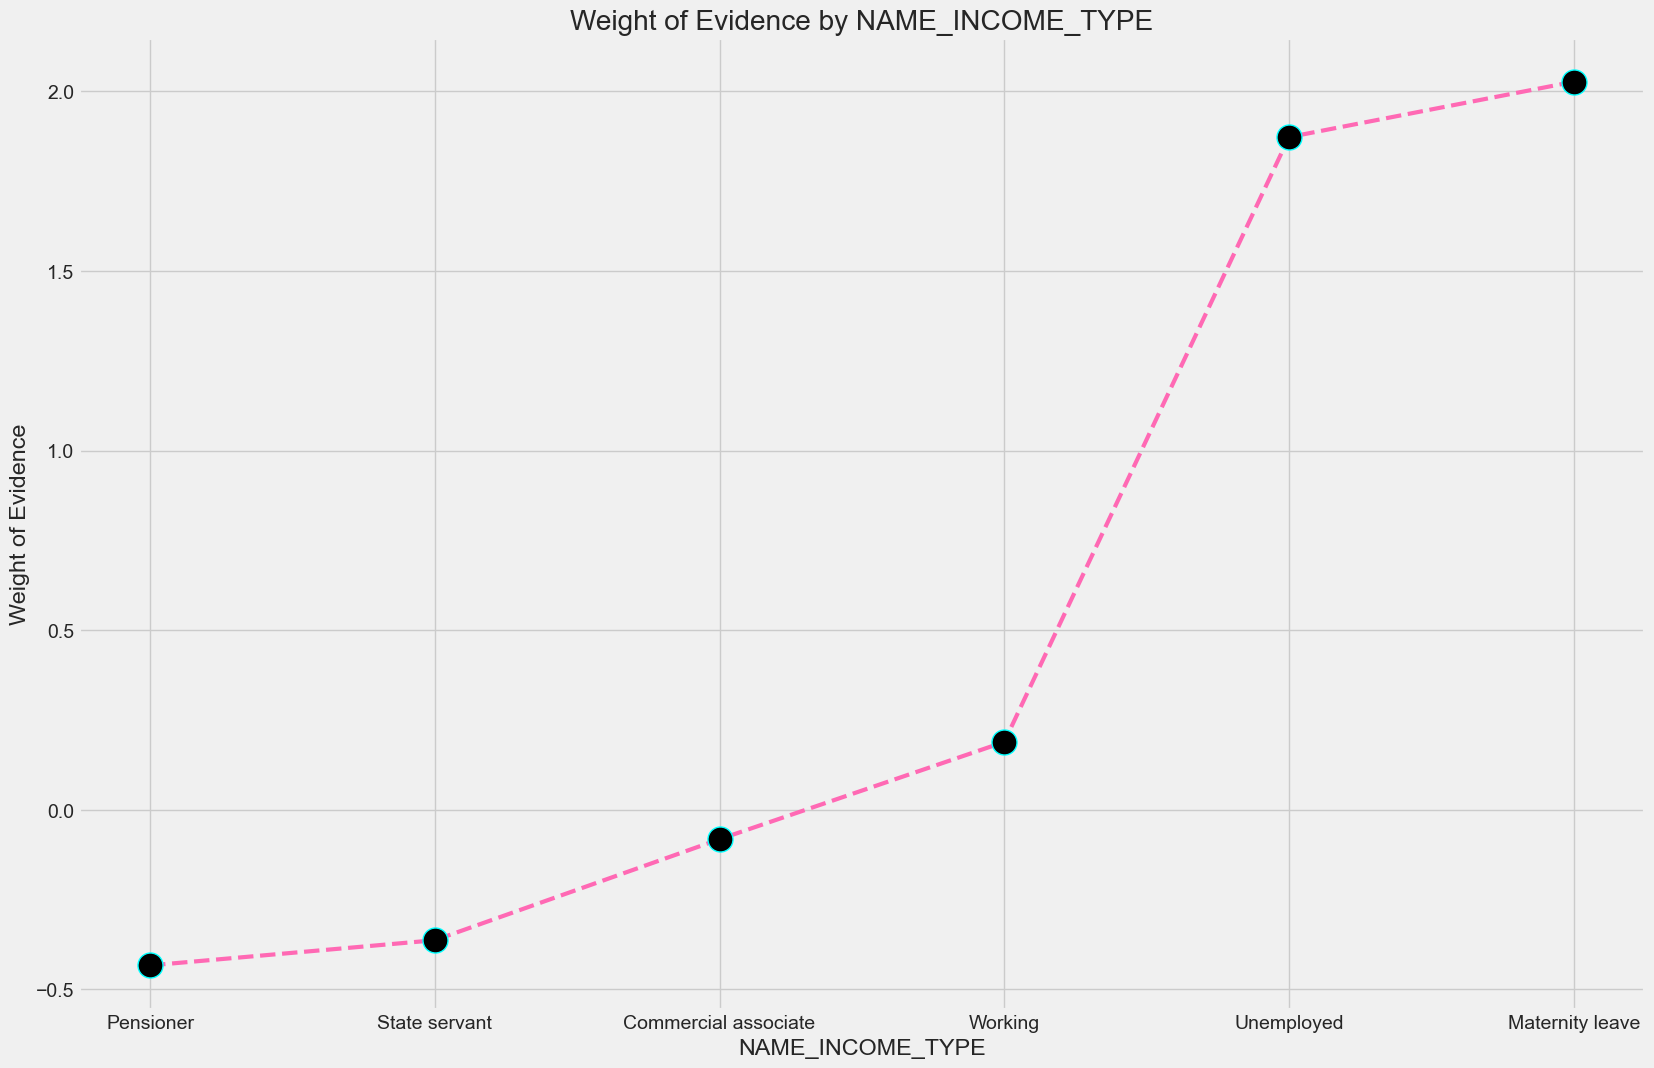

In [171]:
df_grade = weight_of_evidence_categorical(X, 'NAME_INCOME_TYPE', y)
plot_by_weight_of_evidence(df_grade)

#### We can combine Pensioner, state Servant, commercial associate,working together and  umemployed and Maternity together to maintain monotonicity

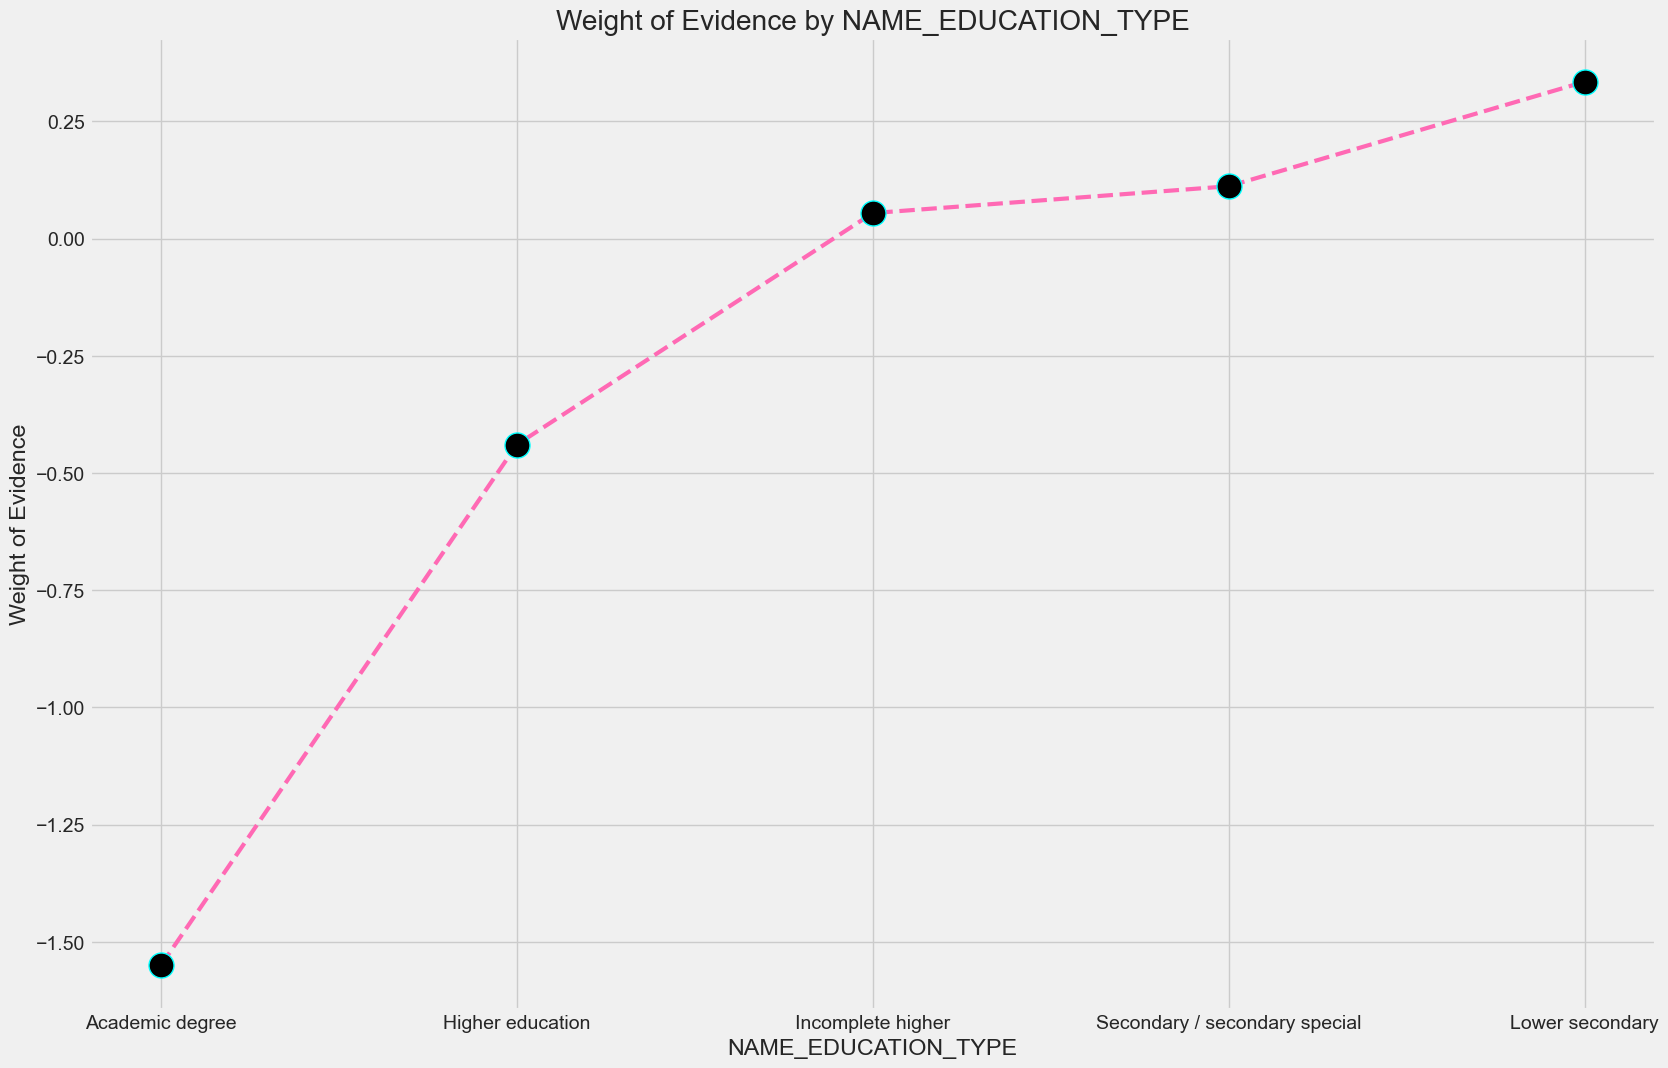

In [172]:
df_grade = weight_of_evidence_categorical(X, 'NAME_EDUCATION_TYPE', y)
plot_by_weight_of_evidence(df_grade)

#### We can combine higher education,Incomplete higher degree with Acedemic degree together

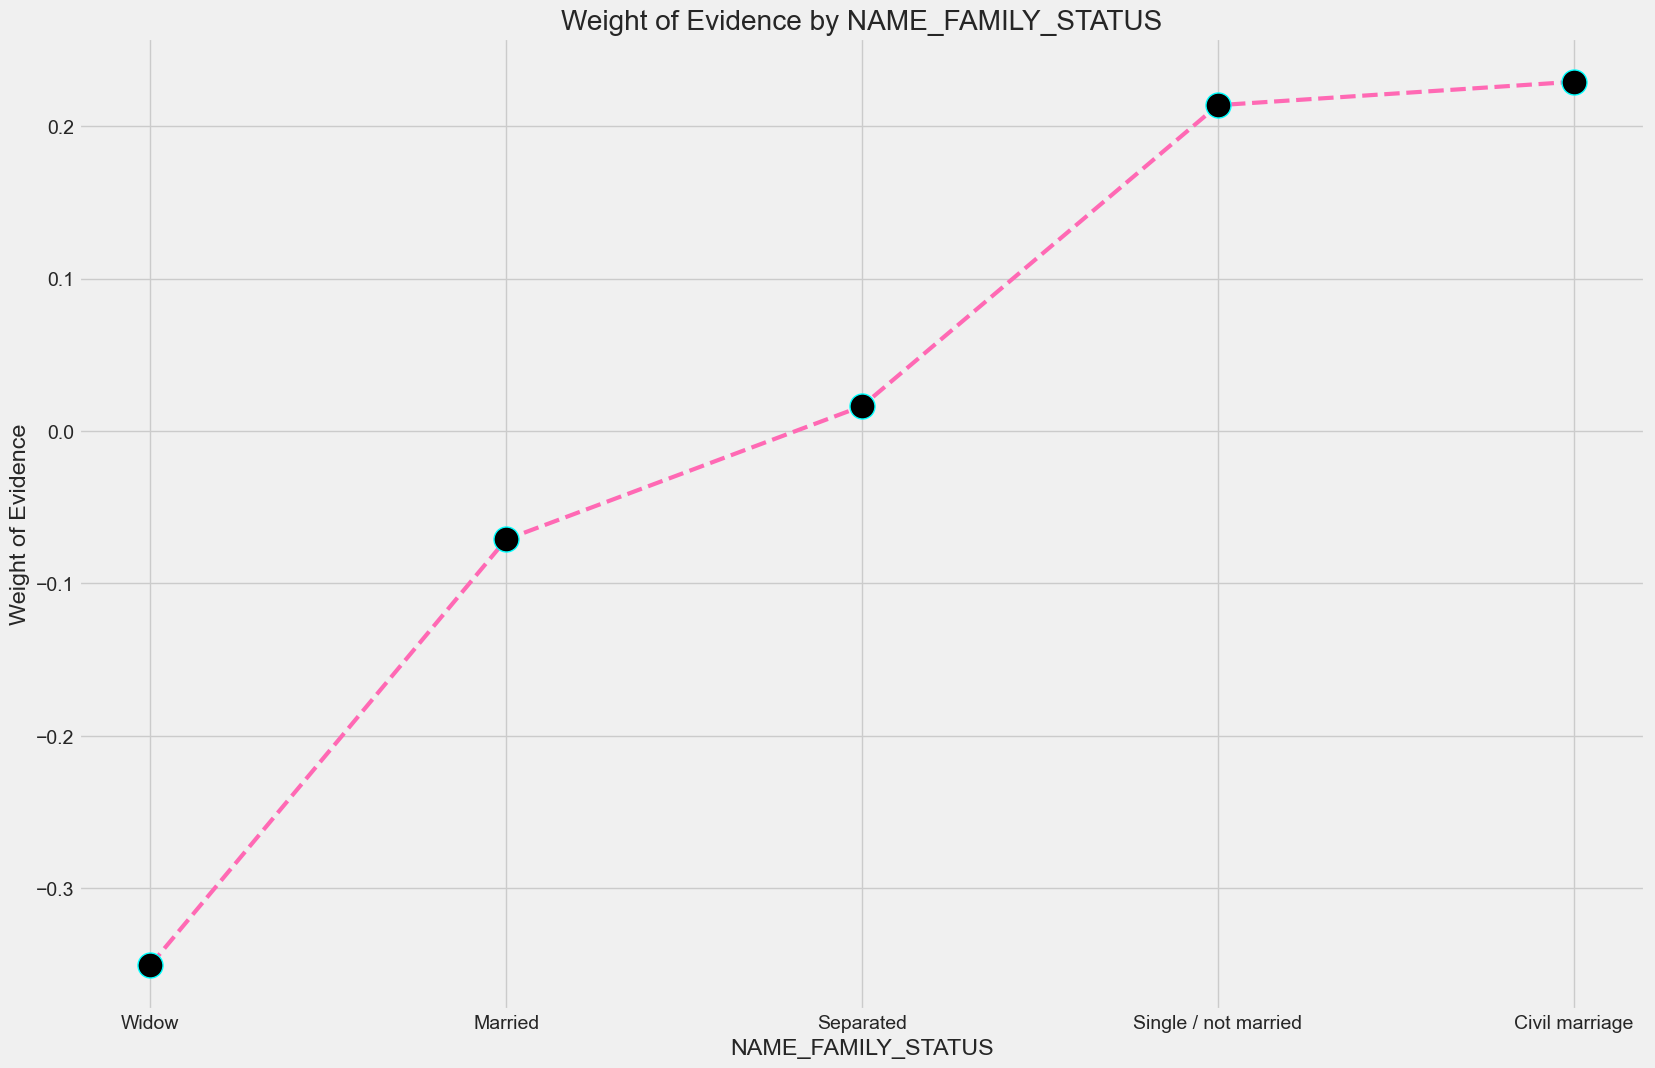

In [173]:
df_grade = weight_of_evidence_categorical(X, 'NAME_FAMILY_STATUS', y)
plot_by_weight_of_evidence(df_grade)

#### We can combine Married and Widow, and single and civil together

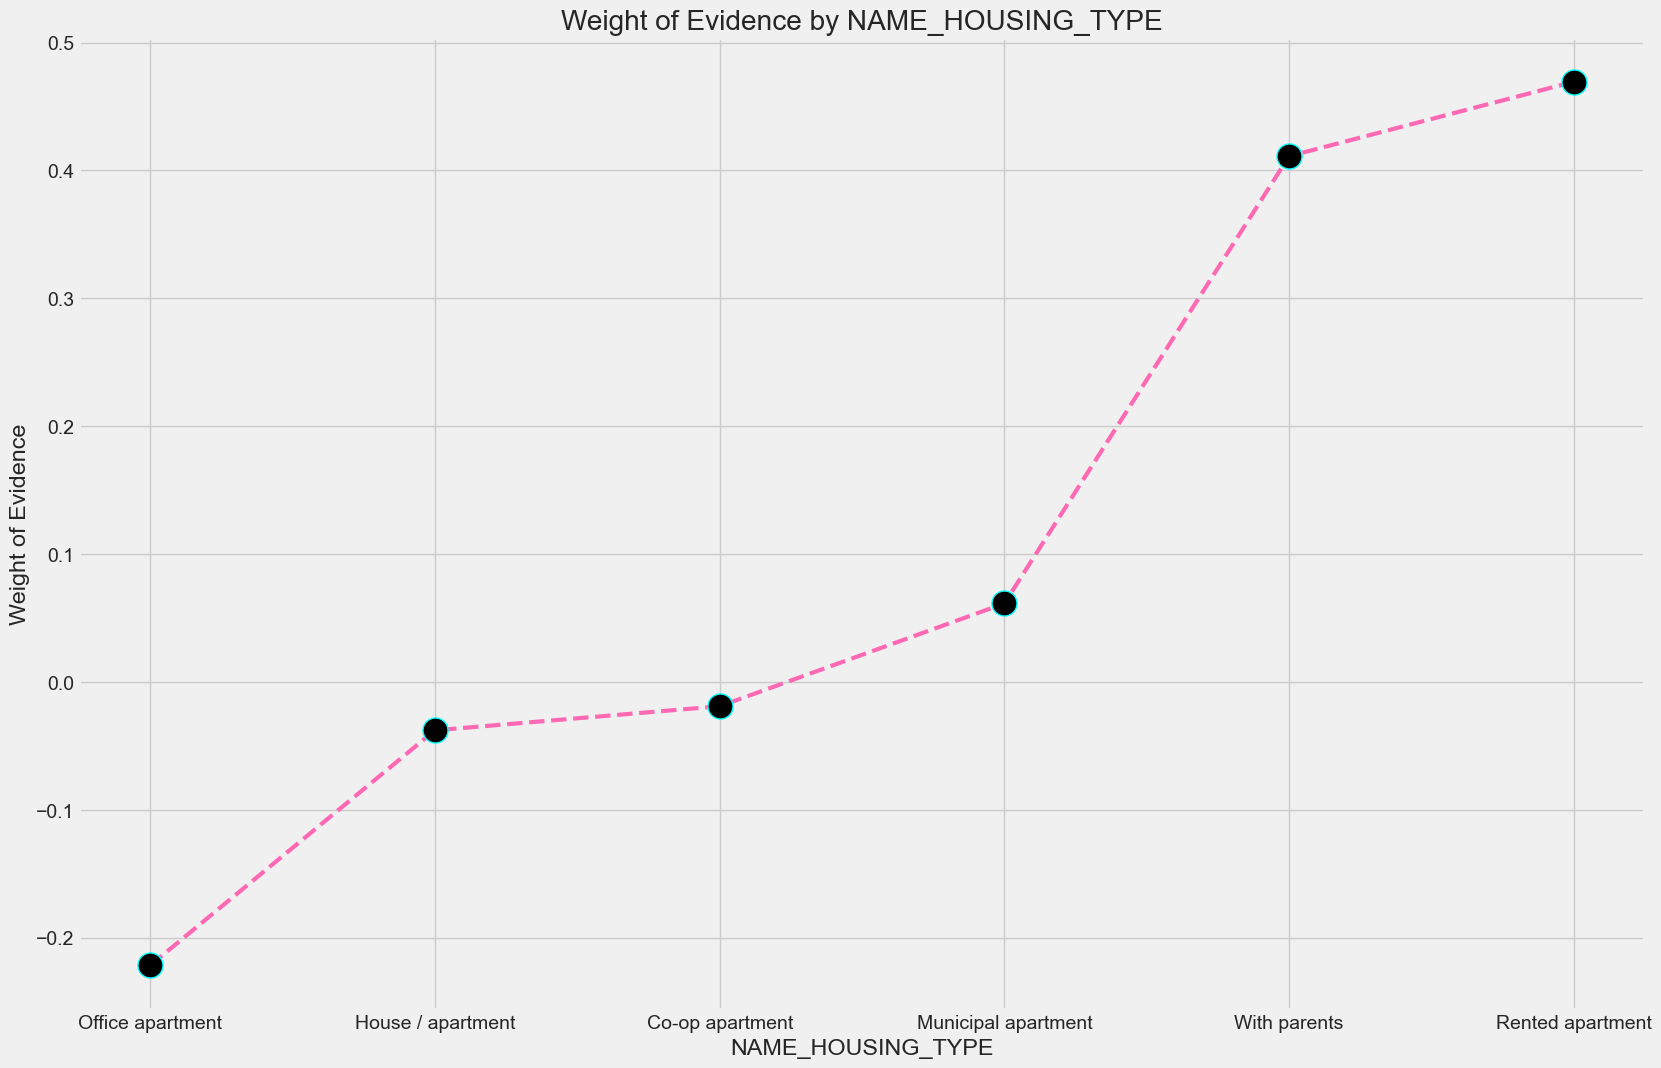

In [174]:
df_grade = weight_of_evidence_categorical(X, 'NAME_HOUSING_TYPE', y)
plot_by_weight_of_evidence(df_grade)

#### we can combine house/apartment,co-op aprtmnt, municipal together

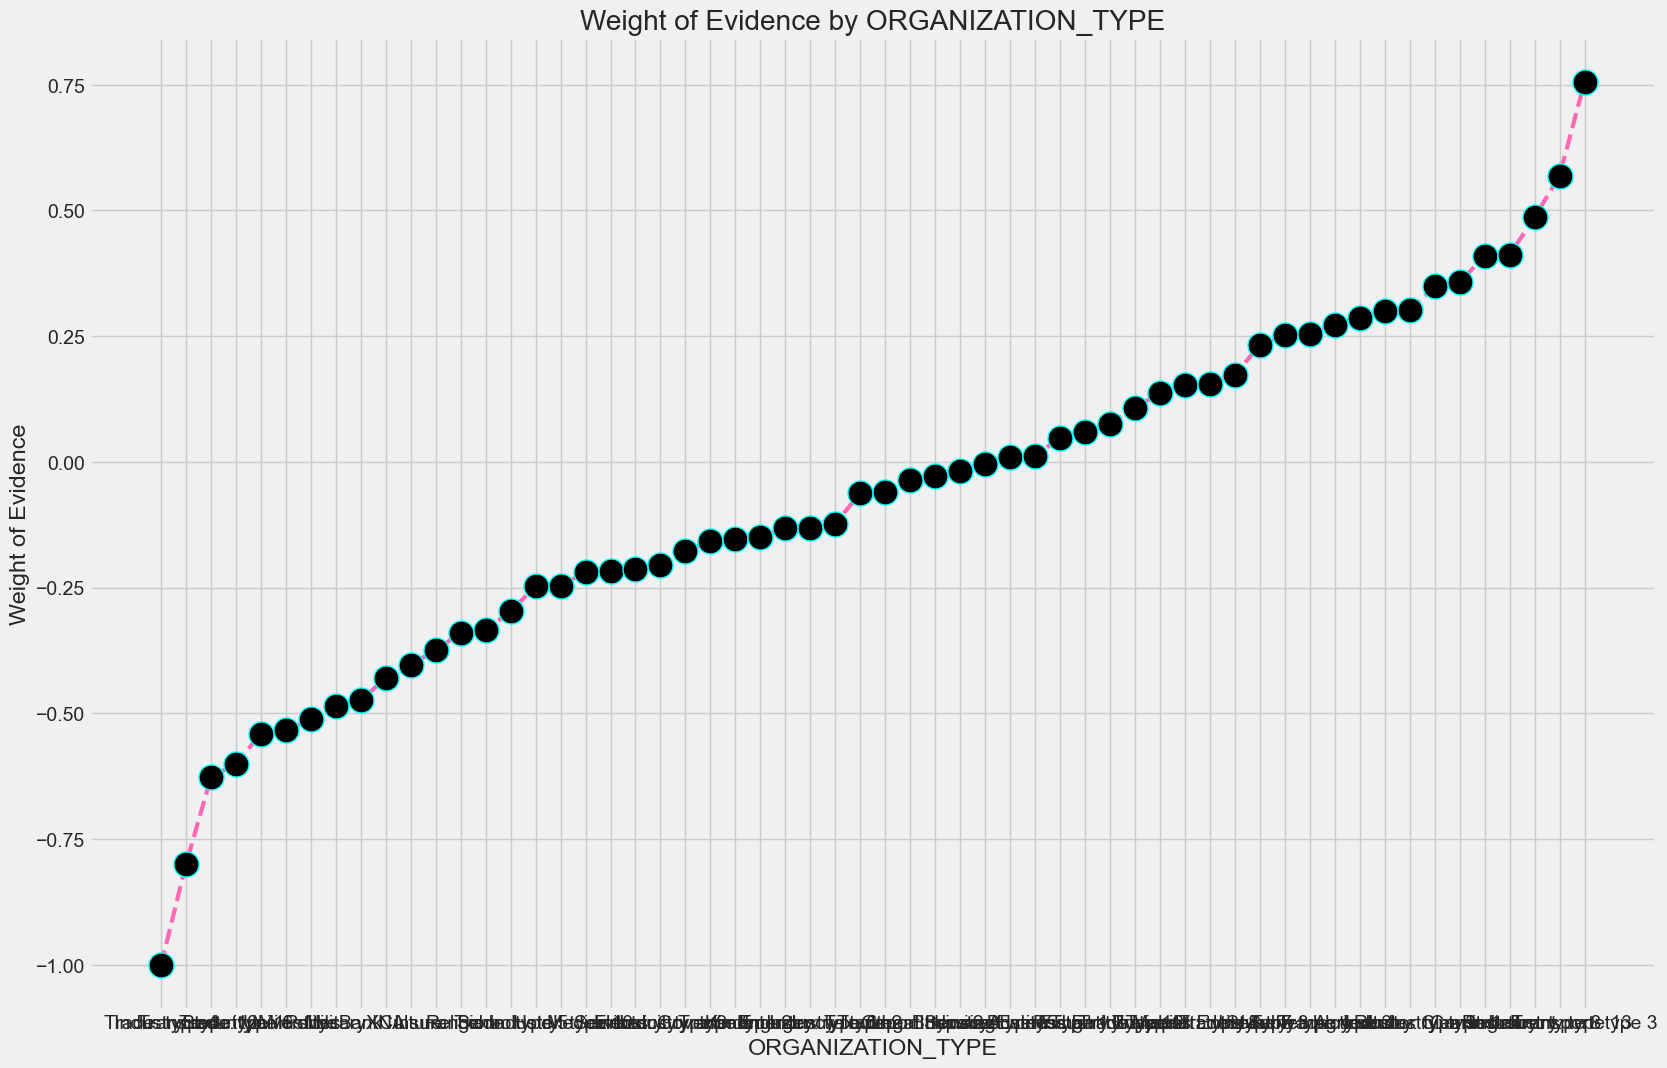

In [175]:
df_grade = weight_of_evidence_categorical(X, 'ORGANIZATION_TYPE', y)
plot_by_weight_of_evidence(df_grade)

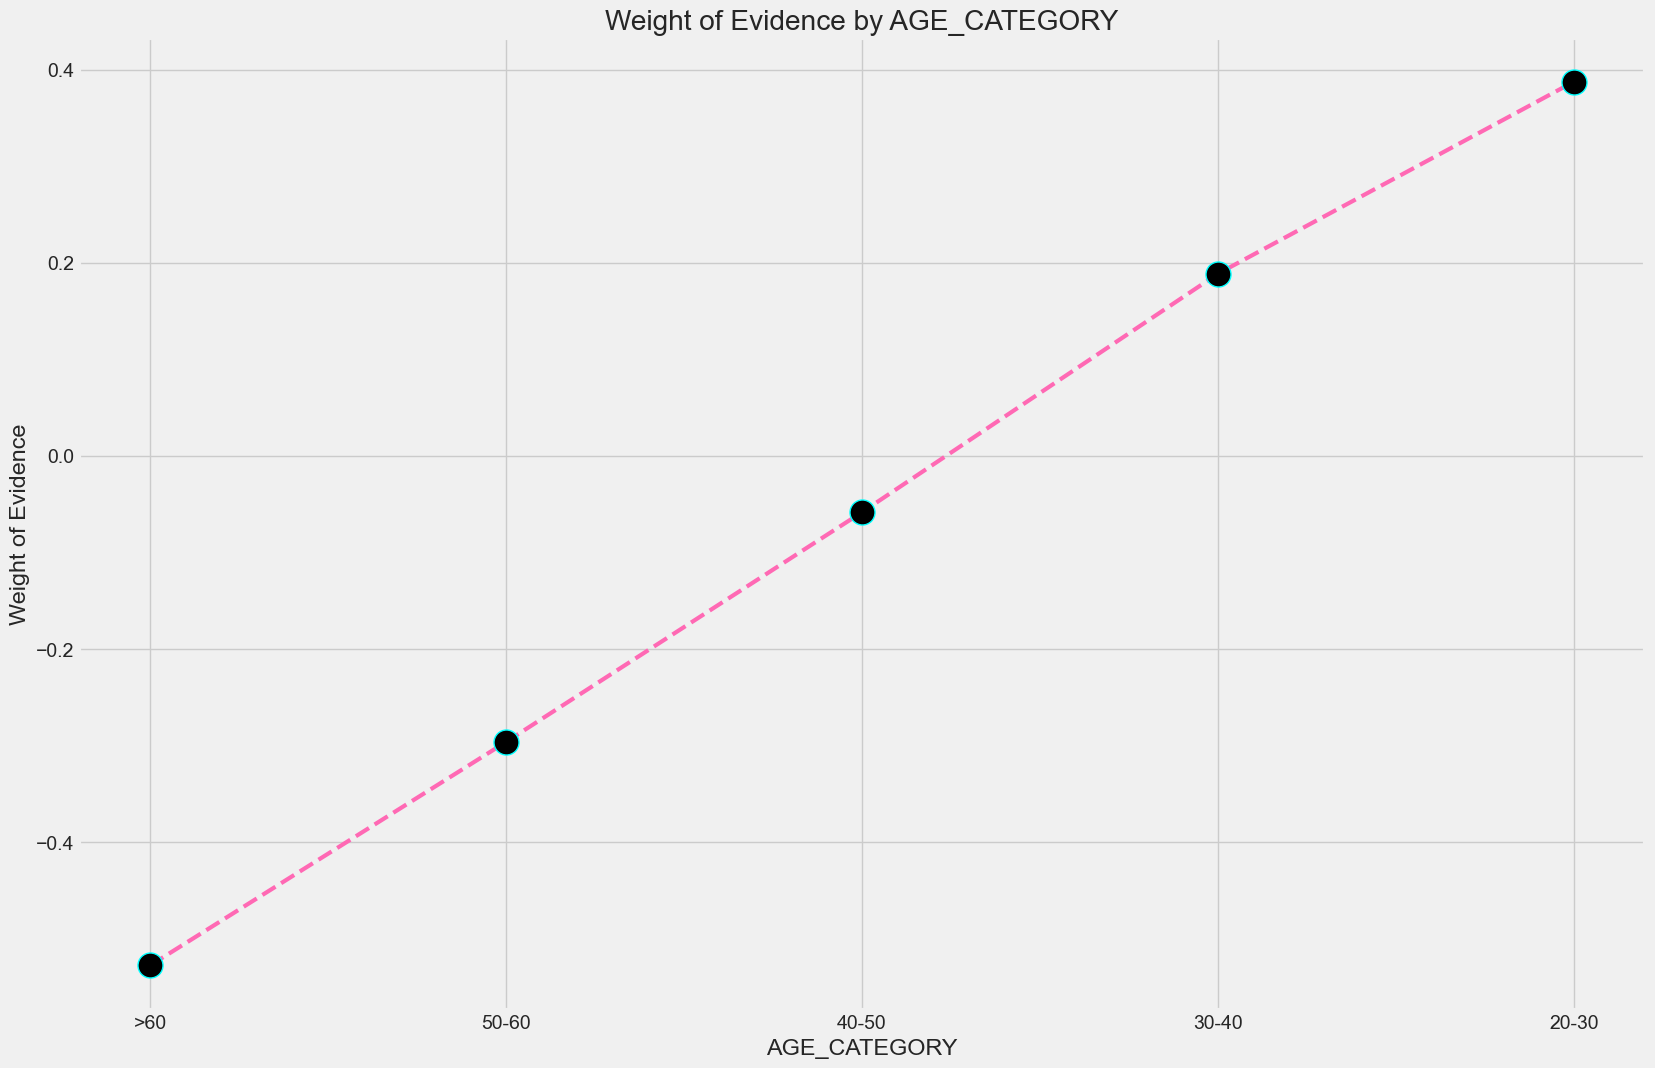

In [176]:
df_grade = weight_of_evidence_categorical(X, 'AGE_CATEGORY', y)
plot_by_weight_of_evidence(df_grade)

#### The age category we can use as a variable in model prediction